In [22]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline
from datetime import datetime


# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('../new_dataset/Texas_Intake_and_Outcome.csv')
df.head(5)

,Animal ID,Name_intakes,DateTime_intakes,MonthYear_intakes,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,...,DateTime_outcomes,MonthYear_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes
0,A664887,*Gia,10/10/2013 01:48:00 PM,October 2013,1901 Onion Creek Pkwy in Austin (TX),Stray,Normal,Cat,Intact Female,1 month,...,11/10/2013 04:56:00 PM,Nov 2013,08/10/2013,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Black
1,A665496,Mikey,10/18/2013 06:07:00 PM,October 2013,12001 Metric Blvd in Austin (TX),Stray,Normal,Cat,Neutered Male,3 years,...,10/22/2013 05:54:00 PM,Oct 2013,04/18/2010,Adoption,NaN,Cat,Neutered Male,3 years,Bengal,Brown Tiger
2,A664936,*Jester,10/11/2013 11:20:00 AM,October 2013,501 U.S. 183 in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,12/18/2013 06:18:00 PM,Dec 2013,08/18/2013,Adoption,NaN,Cat,Neutered Male,4 months,Domestic Medium Hair Mix,Brown Tabby
3,A665398,Haven,10/17/2013 12:26:00 PM,October 2013,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,...,11/10/2013 04:45:00 PM,Nov 2013,08/19/2013,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair Mix,White/Blue
4,A665426,Silka,10/17/2013 04:53:00 PM,October 2013,8224 Research Blvd #244 in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,11/16/2013 05:09:00 PM,Nov 2013,08/26/2013,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [24]:
# List of columns to drop outcome subtype is dropped because getting rid 
#of the nulls for it takes wayyyyy too many samples and it doesnt really matter because
#we have outcome type as adoption UNLESS YOU WANT TO THINK OF OUTCOME SUBTYPE = FOSTER AS NOT REAL ADOPTION
#OUTCOME SUBTYPE IS MOSTLY EMPTY BECAUSE SOMETIMES THEY ARE ADOPTED AND THATS IT
columns_to_drop = ['Found Location', 'Animal Type_intakes', 'Name_intakes',
                   'Name_outcomes','Breed_outcomes','Color_outcomes','Animal Type_outcomes',
                   'MonthYear_intakes','MonthYear_outcomes','Outcome Subtype']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [25]:
df.tail(50)

,Animal ID,DateTime_intakes,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Sex upon Outcome,Age upon Outcome
28695,A890657,10/10/2023 03:21:00 PM,Stray,Normal,Intact Female,2 years,Domestic Shorthair Mix,White/Orange Tabby,11/22/2023 05:12:00 PM,10/10/2021,Adoption,Spayed Female,2 years
28696,A889226,09/19/2023 08:04:00 AM,Stray,Injured,Intact Male,2 months,Domestic Shorthair,Black/White,11/20/2023 12:11:00 PM,07/19/2023,Adoption,Neutered Male,4 months
28697,A889153,09/18/2023 12:15:00 PM,Stray,Injured,Intact Male,1 month,Domestic Shorthair,Black,11/20/2023 12:12:00 PM,07/26/2023,Adoption,Neutered Male,3 months
28698,A833244,04/26/2021 04:14:00 PM,Stray,Normal,Intact Female,2 years,Domestic Shorthair,Orange Tabby,04/30/2021 06:09:00 PM,04/26/2019,Adoption,Spayed Female,2 years
28699,A889463,09/22/2023 02:36:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair,Black/White,11/19/2023 10:47:00 AM,08/12/2023,Adoption,Neutered Male,3 months
28700,A893338,11/19/2023 06:23:00 PM,Owner Surrender,Normal,Spayed Female,3 years,Domestic Longhair,Orange/White,11/21/2023 04:01:00 PM,11/19/2020,Adoption,Spayed Female,3 years
28701,A881888,05/28/2023 12:39:00 PM,Stray,Normal,Spayed Female,8 years,Domestic Shorthair,Brown Tabby,11/21/2023 10:12:00 AM,05/01/2015,Adoption,Spayed Female,8 years
28702,A893178,11/16/2023 02:39:00 PM,Stray,Normal,Neutered Male,2 years,Domestic Medium Hair,Cream Tabby,11/20/2023 12:01:00 PM,11/16/2021,Adoption,Neutered Male,2 years
28703,A891300,10/20/2023 10:39:00 AM,Stray,Normal,Intact Female,2 months,Domestic Shorthair,Brown Tabby,11/20/2023 03:27:00 PM,08/13/2023,Adoption,Spayed Female,3 months
28704,A890791,10/12/2023 01:03:00 PM,Stray,Normal,Intact Female,3 months,Domestic Shorthair,Tortie,10/16/2023 05:07:00 PM,07/12/2023,Adoption,Intact Female,3 months


In [26]:
columns_to_rename = {
    'DateTime_intakes': 'date_intake',
    'Intake Type': 'intake_type',
    'Intake Condition': 'intake_condition',
    'Sex upon Intake': 'sex_intake',
    'Age upon Intake': 'age_intake',
    'Breed_intakes':'breed',
    'Color_intakes':'color',
    'DateTime_outcomes':'date_outcome',
    'Date of Birth':'dob',
    'Outcome Type':'outcome_type',
    'Outcome Subtype':'outcome_subtype',
    'Sex upon Outcome':'sex_outcome',
    'Age upon Outcome':'age_outcome'
    
}

# Rename the specified columns
df.rename(columns=columns_to_rename, inplace=True)

In [27]:
#i dropped duplicate ids on before joining them, dont drop duplicates because cats have same names or dates and we might lose samples
df.duplicated().sum()

0

In [28]:
df.isnull().sum()

Animal ID           0
date_intake         0
intake_type         0
intake_condition    0
sex_intake          0
age_intake          0
breed               0
color               0
date_outcome        0
dob                 0
outcome_type        0
sex_outcome         0
age_outcome         0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Animal ID           0
date_intake         0
intake_type         0
intake_condition    0
sex_intake          0
age_intake          0
breed               0
color               0
date_outcome        0
dob                 0
outcome_type        0
sex_outcome         0
age_outcome         0
dtype: int64

In [31]:
df.tail(50)

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome
28695,A890657,10/10/2023 03:21:00 PM,Stray,Normal,Intact Female,2 years,Domestic Shorthair Mix,White/Orange Tabby,11/22/2023 05:12:00 PM,10/10/2021,Adoption,Spayed Female,2 years
28696,A889226,09/19/2023 08:04:00 AM,Stray,Injured,Intact Male,2 months,Domestic Shorthair,Black/White,11/20/2023 12:11:00 PM,07/19/2023,Adoption,Neutered Male,4 months
28697,A889153,09/18/2023 12:15:00 PM,Stray,Injured,Intact Male,1 month,Domestic Shorthair,Black,11/20/2023 12:12:00 PM,07/26/2023,Adoption,Neutered Male,3 months
28698,A833244,04/26/2021 04:14:00 PM,Stray,Normal,Intact Female,2 years,Domestic Shorthair,Orange Tabby,04/30/2021 06:09:00 PM,04/26/2019,Adoption,Spayed Female,2 years
28699,A889463,09/22/2023 02:36:00 PM,Stray,Normal,Intact Male,1 month,Domestic Shorthair,Black/White,11/19/2023 10:47:00 AM,08/12/2023,Adoption,Neutered Male,3 months
28700,A893338,11/19/2023 06:23:00 PM,Owner Surrender,Normal,Spayed Female,3 years,Domestic Longhair,Orange/White,11/21/2023 04:01:00 PM,11/19/2020,Adoption,Spayed Female,3 years
28701,A881888,05/28/2023 12:39:00 PM,Stray,Normal,Spayed Female,8 years,Domestic Shorthair,Brown Tabby,11/21/2023 10:12:00 AM,05/01/2015,Adoption,Spayed Female,8 years
28702,A893178,11/16/2023 02:39:00 PM,Stray,Normal,Neutered Male,2 years,Domestic Medium Hair,Cream Tabby,11/20/2023 12:01:00 PM,11/16/2021,Adoption,Neutered Male,2 years
28703,A891300,10/20/2023 10:39:00 AM,Stray,Normal,Intact Female,2 months,Domestic Shorthair,Brown Tabby,11/20/2023 03:27:00 PM,08/13/2023,Adoption,Spayed Female,3 months
28704,A890791,10/12/2023 01:03:00 PM,Stray,Normal,Intact Female,3 months,Domestic Shorthair,Tortie,10/16/2023 05:07:00 PM,07/12/2023,Adoption,Intact Female,3 months


In [32]:
import pandas as pd

# Assuming 'date_intake' and 'date_outcome' are your columns with date
# Convert them to datetime format
df['date_intake'] = pd.to_datetime(df['date_intake'])
df['date_outcome'] = pd.to_datetime(df['date_outcome'])

# Calculate the stay_length by subtracting intake_date from outcome_date
df['stay_length'] = (df['date_outcome'] - df['date_intake']).dt.days

In [33]:
df.head(50)

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30
5,A666091,2013-10-26 16:43:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Black/White,2013-12-06 15:54:00,09/11/2013,Adoption,Neutered Male,2 months,40
6,A665994,2013-10-25 17:41:00,Stray,Normal,Intact Female,3 months,Domestic Shorthair Mix,Calico,2013-11-05 19:22:00,07/25/2013,Adoption,Spayed Female,3 months,11
7,A664857,2013-10-10 07:47:00,Stray,Normal,Intact Male,6 months,Domestic Shorthair Mix,Black/White,2013-10-14 17:34:00,04/10/2013,Adoption,Neutered Male,6 months,4
8,A664754,2013-10-08 16:46:00,Owner Surrender,Normal,Intact Male,5 months,Domestic Shorthair Mix,Black,2013-10-13 18:03:00,04/23/2013,Adoption,Neutered Male,5 months,5
9,A664446,2013-10-03 13:06:00,Stray,Injured,Intact Male,3 years,Domestic Shorthair Mix,Orange Tabby,2014-03-15 15:27:00,10/03/2010,Adoption,Neutered Male,3 years,163


# Simplifing the Color to Coat Color And Coat Pattern

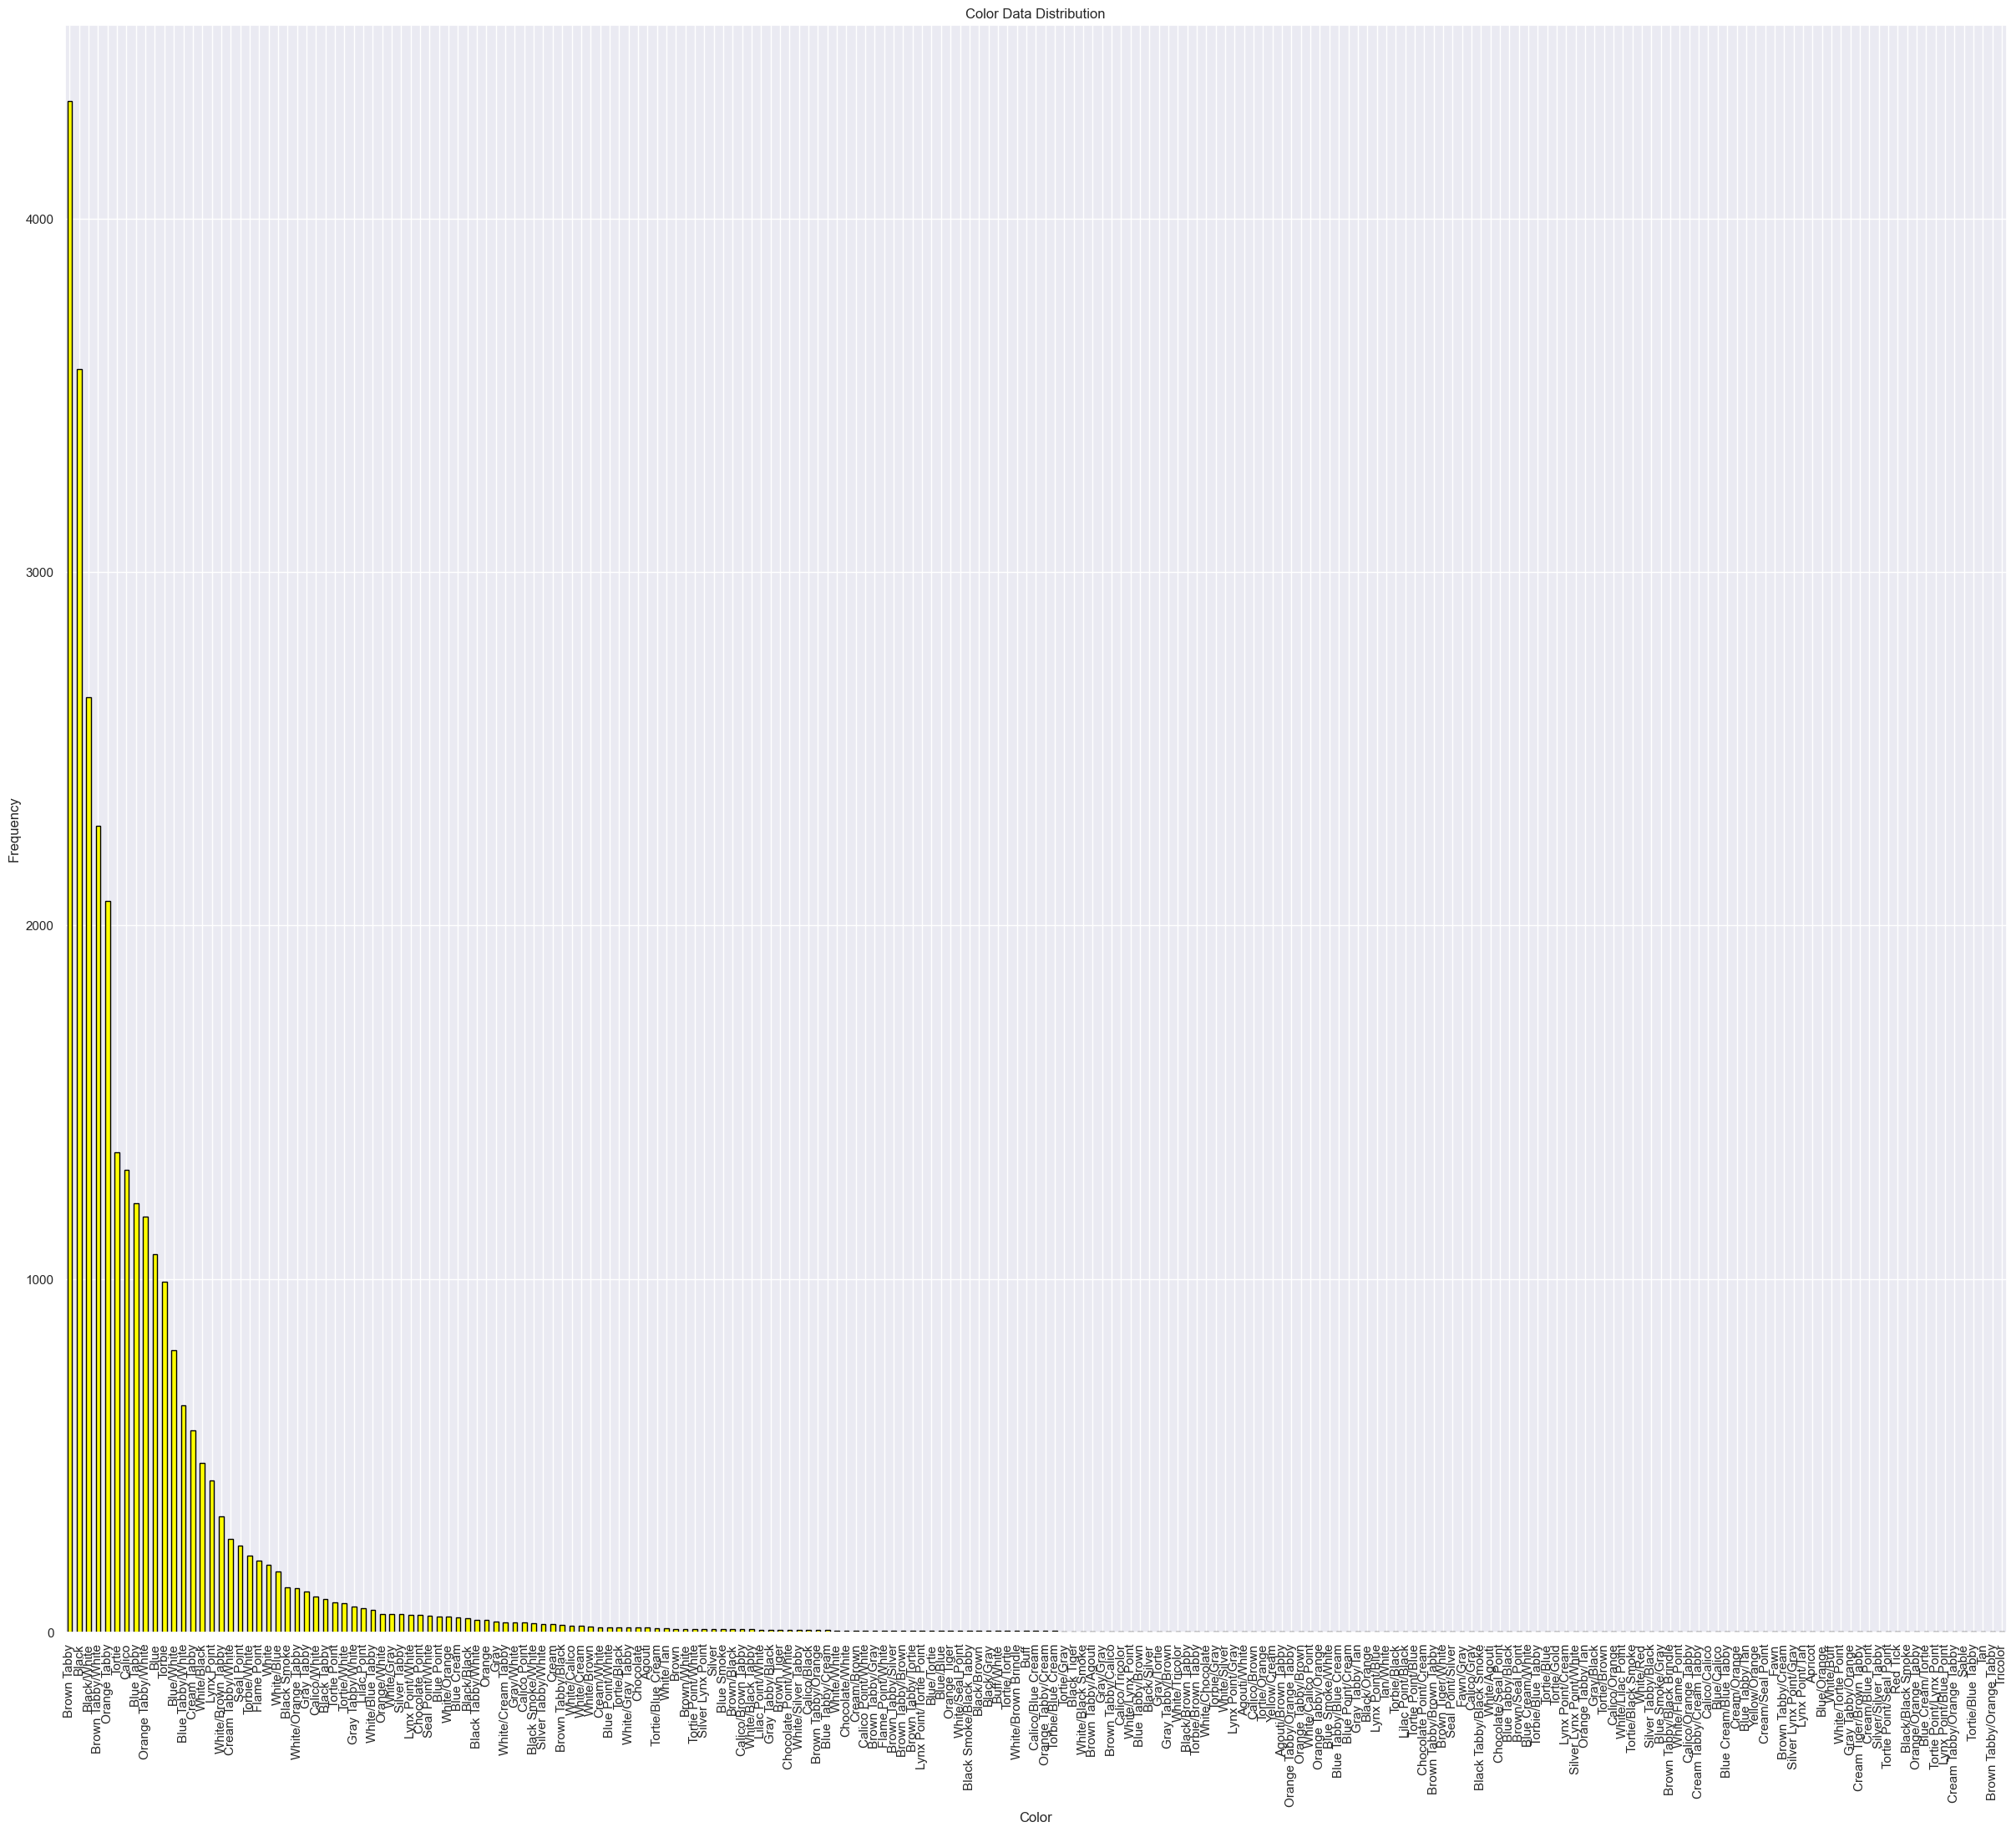

In [34]:
#ALL COLORS TOGETGER SO YOU CAN HAVE AN IDEA OF WHY I CHOSE ONLY THE FIRST WORD
category_counts = df['color'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

In [35]:


# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
category_counts = df['color'].value_counts()

# Convert the Series to a DataFrame for better display
category_counts_df = pd.DataFrame({'Color': category_counts.index, 'Count': category_counts.values})

# Display the DataFrame
print(category_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


                         Color  Count
0                  Brown Tabby   4332
1                        Black   3575
2                  Black/White   2646
3            Brown Tabby/White   2281
4                 Orange Tabby   2070
5                       Tortie   1357
6                       Calico   1308
7                   Blue Tabby   1215
8           Orange Tabby/White   1175
9                         Blue   1069
10                      Torbie    992
11                  Blue/White    799
12            Blue Tabby/White    641
13                 Cream Tabby    572
14                 White/Black    478
15                  Lynx Point    430
16           White/Brown Tabby    329
17           Cream Tabby/White    265
18                  Seal Point    246
19                Torbie/White    217
20                 Flame Point    202
21                       White    191
22                  White/Blue    171
23                 Black Smoke    128
24          White/Orange Tabby    125
25          

# Separating Coat Color and pattern

In [36]:
# Assuming df is your DataFrame with the 'Color' column
# Create new columns 'CoatColor' and 'CoatPattern'

pd.set_option('display.max_rows', None)
df['CoatColor'] = df['color'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)
df['CoatPattern'] = df['color'].apply(lambda x: x.split(' ')[1] if ' ' in x else 'Solid')

# Display the DataFrame with new columns
print(df[['color', 'CoatColor', 'CoatPattern']].head(100))
pd.reset_option('display.max_rows')

                 color     CoatColor  CoatPattern
0                Black         Black        Solid
1          Brown Tiger         Brown        Tiger
2          Brown Tabby         Brown        Tabby
3           White/Blue    White/Blue        Solid
4                Black         Black        Solid
5          Black/White   Black/White        Solid
6               Calico        Calico        Solid
7          Black/White   Black/White        Solid
8                Black         Black        Solid
9         Orange Tabby        Orange        Tabby
10               Black         Black        Solid
11              Torbie        Torbie        Solid
12         Brown Tabby         Brown        Tabby
13              Tortie        Tortie        Solid
14         Brown Tabby         Brown        Tabby
15         Brown Tabby         Brown        Tabby
16         Black/White   Black/White        Solid
17         Black/White   Black/White        Solid
18               Black         Black        Solid


In [37]:
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White/Blue,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [27]:
# def assign_color(input_string):
#     if 'Brown Tabby' in input_string:
#         return 'Brown Tabby'
#     elif 'Orange Tabby' in input_string:
#         return 'Orange Tabby'
#     elif 'Black/White' in input_string or 'White/Black' in input_string:
#         return 'BLACK_N_WHITE'
#     elif 'Gray/White' in input_string or 'White/Gray' in input_string:
#         return 'GRAY_N_WHITE'
#     elif 'Tortie' in input_string:
#         return 'Tortie'
#     elif 'Gray Tabby' in input_string:
#         return 'Gray Tabby'
#     elif 'Tabby' in input_string:
#         return 'OTHER_TABBY'
#     elif 'Black/Black' in input_string:
#         return 'BLACK'
# #     elif '/' in input_string or ' ' in input_string:
# #         return 'MIX'
#     else:
#         return input_string

# df['simplified_color'] = df['color'].apply(assign_color)

# df.head()


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,simplified_color
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White/Blue
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black


# Samplifing Coat Color

In [38]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


          CoatColor  Count
0             Brown   6682
1             Black   3864
2            Orange   3294
3              Blue   3054
4       Black/White   2646
5            Tortie   1453
6            Calico   1340
7            Torbie    992
8             Cream    862
9        Blue/White    799
10             Lynx    489
11      White/Black    488
12      White/Brown    349
13             Seal    294
14       White/Blue    235
15             Gray    228
16     Torbie/White    217
17            Flame    207
18            White    191
19     White/Orange    169
20     Calico/White    100
21           Silver     96
22     Tortie/White     81
23            Lilac     77
24        Chocolate     69
25       White/Gray     64
26     Orange/White     52
27      White/Cream     46
28      Black/Black     40
29       Gray/White     28
30     White/Calico     21
31      Cream/White     14
32     Tortie/Black     14
33           Agouti     13
34      Tortie/Blue     13
35        White/Tan     11
3

## step 1

In [39]:
def assign_color(input_string):
    if 'Torbie' in input_string:
        return 'Torbie_or_Torbie_mix'
    if 'Tortie' in input_string:
        return 'Tortie_or_Tortie_mix'
    if 'Calico' in input_string:
        return 'Calico_or_Calico_mix'
    elif 'Black/Black' in input_string:
        return 'Black'
    elif 'Black/White' in input_string or 'White/Black' in input_string:
         return 'Black_N_White'
    elif '/White' in input_string or 'White/' in input_string:
         return 'White_Mix'
    elif 'Orange/Orange' in input_string:
        return 'Orange'
#     elif '/' in input_string or ' ' in input_string:
#         return 'MIX'
    else:
        return input_string

df['CoatColor'] = df['CoatColor'].apply(assign_color)

df.head()


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [40]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

               CoatColor  Count
0                  Brown   6682
1                  Black   3904
2                 Orange   3295
3          Black_N_White   3134
4                   Blue   3054
5              White_Mix   1815
6   Tortie_or_Tortie_mix   1577
7   Calico_or_Calico_mix   1487
8   Torbie_or_Torbie_mix   1218
9                  Cream    862
10                  Lynx    489
11                  Seal    294
12                  Gray    228
13                 Flame    207
14                 White    191
15                Silver     96
16                 Lilac     77
17             Chocolate     69
18                Agouti     13
19           Brown/Black      8
20           Black/Brown      5
21           Cream/Brown      5
22             Blue/Blue      4
23                  Buff      3
24            Black/Gray      3
25          Agouti/Brown      2
26          Yellow/Cream      2
27          Black/Silver      2
28             Gray/Gray      2
29          Black/Orange      1
30      

## Step 2

In [47]:
def assign_color(input_string):
    colors_to_check = ['Brown', 'Black', 'Orange', 'Black_N_White', 'Blue', 'White_Mix', 'Tortie_or_Tortie_mix', 'Calico_or_Calico_mix', 'Torbie_or_Torbie_mix']
    
    if '/' in input_string:
        return 'Other'
    elif any(color in input_string for color in colors_to_check):
        return input_string
    else:
        return 'Other'

df['CoatColor'] = df['CoatColor'].apply(assign_color)
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [48]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

              CoatColor  Count
0                 Brown   6682
1                 Black   3904
2                Orange   3295
3         Black_N_White   3134
4                  Blue   3054
5                 Other   2579
6             White_Mix   1815
7  Tortie_or_Tortie_mix   1577
8  Calico_or_Calico_mix   1487
9  Torbie_or_Torbie_mix   1218


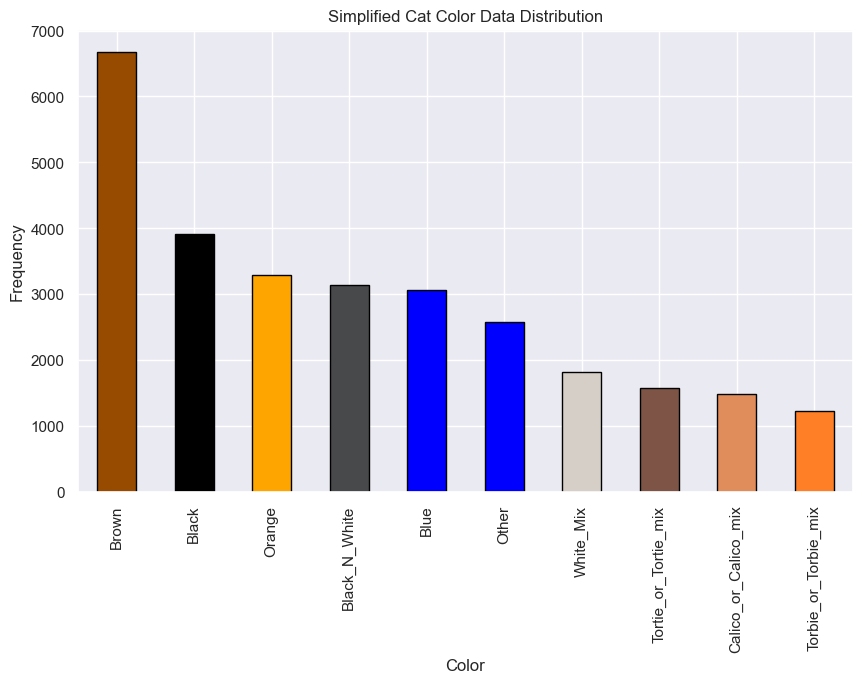

In [49]:
import matplotlib.pyplot as plt

# Assuming category_counts2 is your Series
# color_category_counts2 = pd.Series({'TABBY': 949, 'BLACK': 744, 'OTHER': 626, 'GRAY': 333, 'WHITE': 219})

# Create a color dictionary for each category
color_dict = {'Brown': '#964B00', 'Black': 'black', 'Orange': 'orange', 'Black_N_White':'#48494B', 'Blue': 'blue','White_Mix': '#D6CFC7', 'Tortie_or_Tortie_mix': '#7d5446', 'Calico_or_Calico_mix': '#e08d5b','Torbie_or_Torbie_mix': '#ff7f26', 'OTHER': 'white'}

# Plot the bar chart with specified colors
CoatColor_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in CoatColor_counts.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Color Data Distribution')

# Display the plot
plt.show()


# still need to work on the below section

# Samplifing Coat Pattern

In [38]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


          CoatColor  Count
0             Brown   6682
1             Black   3864
2            Orange   3294
3              Blue   3054
4       Black/White   2646
5            Tortie   1453
6            Calico   1340
7            Torbie    992
8             Cream    862
9        Blue/White    799
10             Lynx    489
11      White/Black    488
12      White/Brown    349
13             Seal    294
14       White/Blue    235
15             Gray    228
16     Torbie/White    217
17            Flame    207
18            White    191
19     White/Orange    169
20     Calico/White    100
21           Silver     96
22     Tortie/White     81
23            Lilac     77
24        Chocolate     69
25       White/Gray     64
26     Orange/White     52
27      White/Cream     46
28      Black/Black     40
29       Gray/White     28
30     White/Calico     21
31      Cream/White     14
32     Tortie/Black     14
33           Agouti     13
34      Tortie/Blue     13
35        White/Tan     11
3

## step 1

In [39]:
def assign_color(input_string):
    if 'Torbie' in input_string:
        return 'Torbie_or_Torbie_mix'
    if 'Tortie' in input_string:
        return 'Tortie_or_Tortie_mix'
    if 'Calico' in input_string:
        return 'Calico_or_Calico_mix'
    elif 'Black/Black' in input_string:
        return 'Black'
    elif 'Black/White' in input_string or 'White/Black' in input_string:
         return 'Black_N_White'
    elif '/White' in input_string or 'White/' in input_string:
         return 'White_Mix'
    elif 'Orange/Orange' in input_string:
        return 'Orange'
#     elif '/' in input_string or ' ' in input_string:
#         return 'MIX'
    else:
        return input_string

df['CoatColor'] = df['CoatColor'].apply(assign_color)

df.head()


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [40]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

               CoatColor  Count
0                  Brown   6682
1                  Black   3904
2                 Orange   3295
3          Black_N_White   3134
4                   Blue   3054
5              White_Mix   1815
6   Tortie_or_Tortie_mix   1577
7   Calico_or_Calico_mix   1487
8   Torbie_or_Torbie_mix   1218
9                  Cream    862
10                  Lynx    489
11                  Seal    294
12                  Gray    228
13                 Flame    207
14                 White    191
15                Silver     96
16                 Lilac     77
17             Chocolate     69
18                Agouti     13
19           Brown/Black      8
20           Black/Brown      5
21           Cream/Brown      5
22             Blue/Blue      4
23                  Buff      3
24            Black/Gray      3
25          Agouti/Brown      2
26          Yellow/Cream      2
27          Black/Silver      2
28             Gray/Gray      2
29          Black/Orange      1
30      

## Step 2

In [47]:
def assign_color(input_string):
    colors_to_check = ['Brown', 'Black', 'Orange', 'Black_N_White', 'Blue', 'White_Mix', 'Tortie_or_Tortie_mix', 'Calico_or_Calico_mix', 'Torbie_or_Torbie_mix']
    
    if '/' in input_string:
        return 'Other'
    elif any(color in input_string for color in colors_to_check):
        return input_string
    else:
        return 'Other'

df['CoatColor'] = df['CoatColor'].apply(assign_color)
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [48]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

              CoatColor  Count
0                 Brown   6682
1                 Black   3904
2                Orange   3295
3         Black_N_White   3134
4                  Blue   3054
5                 Other   2579
6             White_Mix   1815
7  Tortie_or_Tortie_mix   1577
8  Calico_or_Calico_mix   1487
9  Torbie_or_Torbie_mix   1218


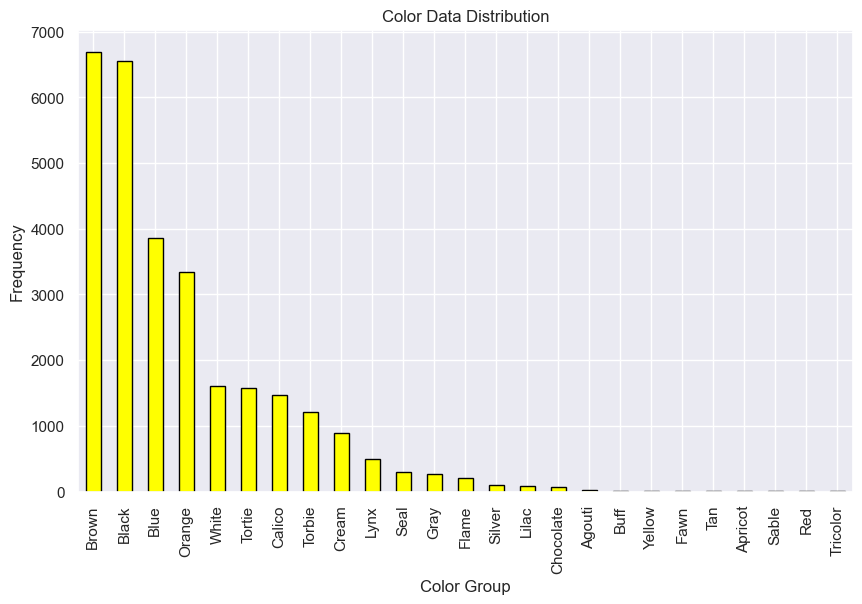

In [14]:
# # Extract the first word from the 'color' column
# df['color'] = df['color'].str.split('/|\s').str[0].str.strip()

# # Plot the distribution
# category_counts = df['color'].value_counts()
# category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(10, 6))

# # Adding labels and title
# plt.xlabel('Color Group')
# plt.ylabel('Frequency')
# plt.title('Color Data Distribution')

# # Display the plot
# plt.show()


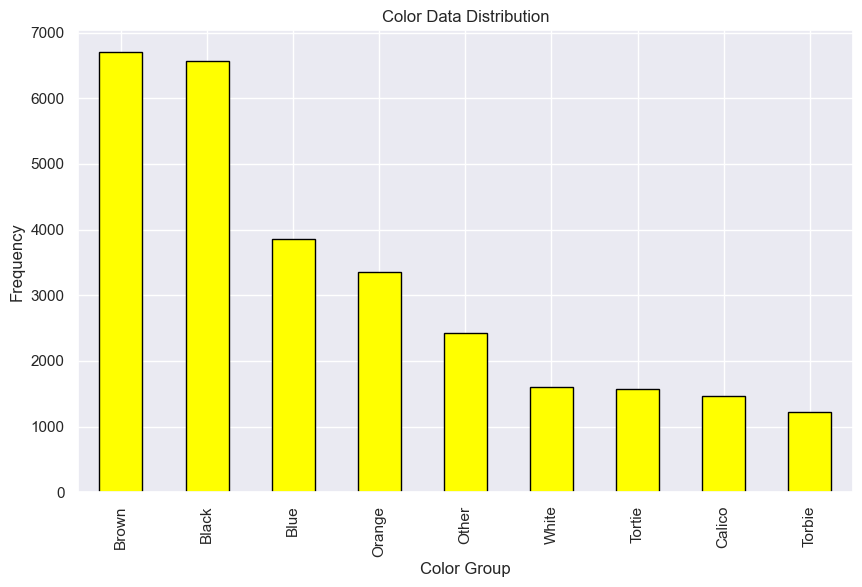

In [15]:
# # Extract the first word from the 'color' column
# df['color'] = df['color'].str.split('/|\s').str[0].str.strip()

# # Count the frequencies
# category_counts = df['color'].value_counts()

# # Identify colors with frequency less than 1000
# colors_to_group = category_counts[category_counts < 1000].index

# # Group colors with frequency less than 1000 into 'Other'
# df['color'] = df['color'].apply(lambda x: 'Other' if x in colors_to_group else x)

# # Plot the distribution
# category_counts = df['color'].value_counts()
# category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(10, 6))

# # Adding labels and title
# plt.xlabel('Color Group')
# plt.ylabel('Frequency')
# plt.title('Color Data Distribution')

# # Display the plot
# plt.show()

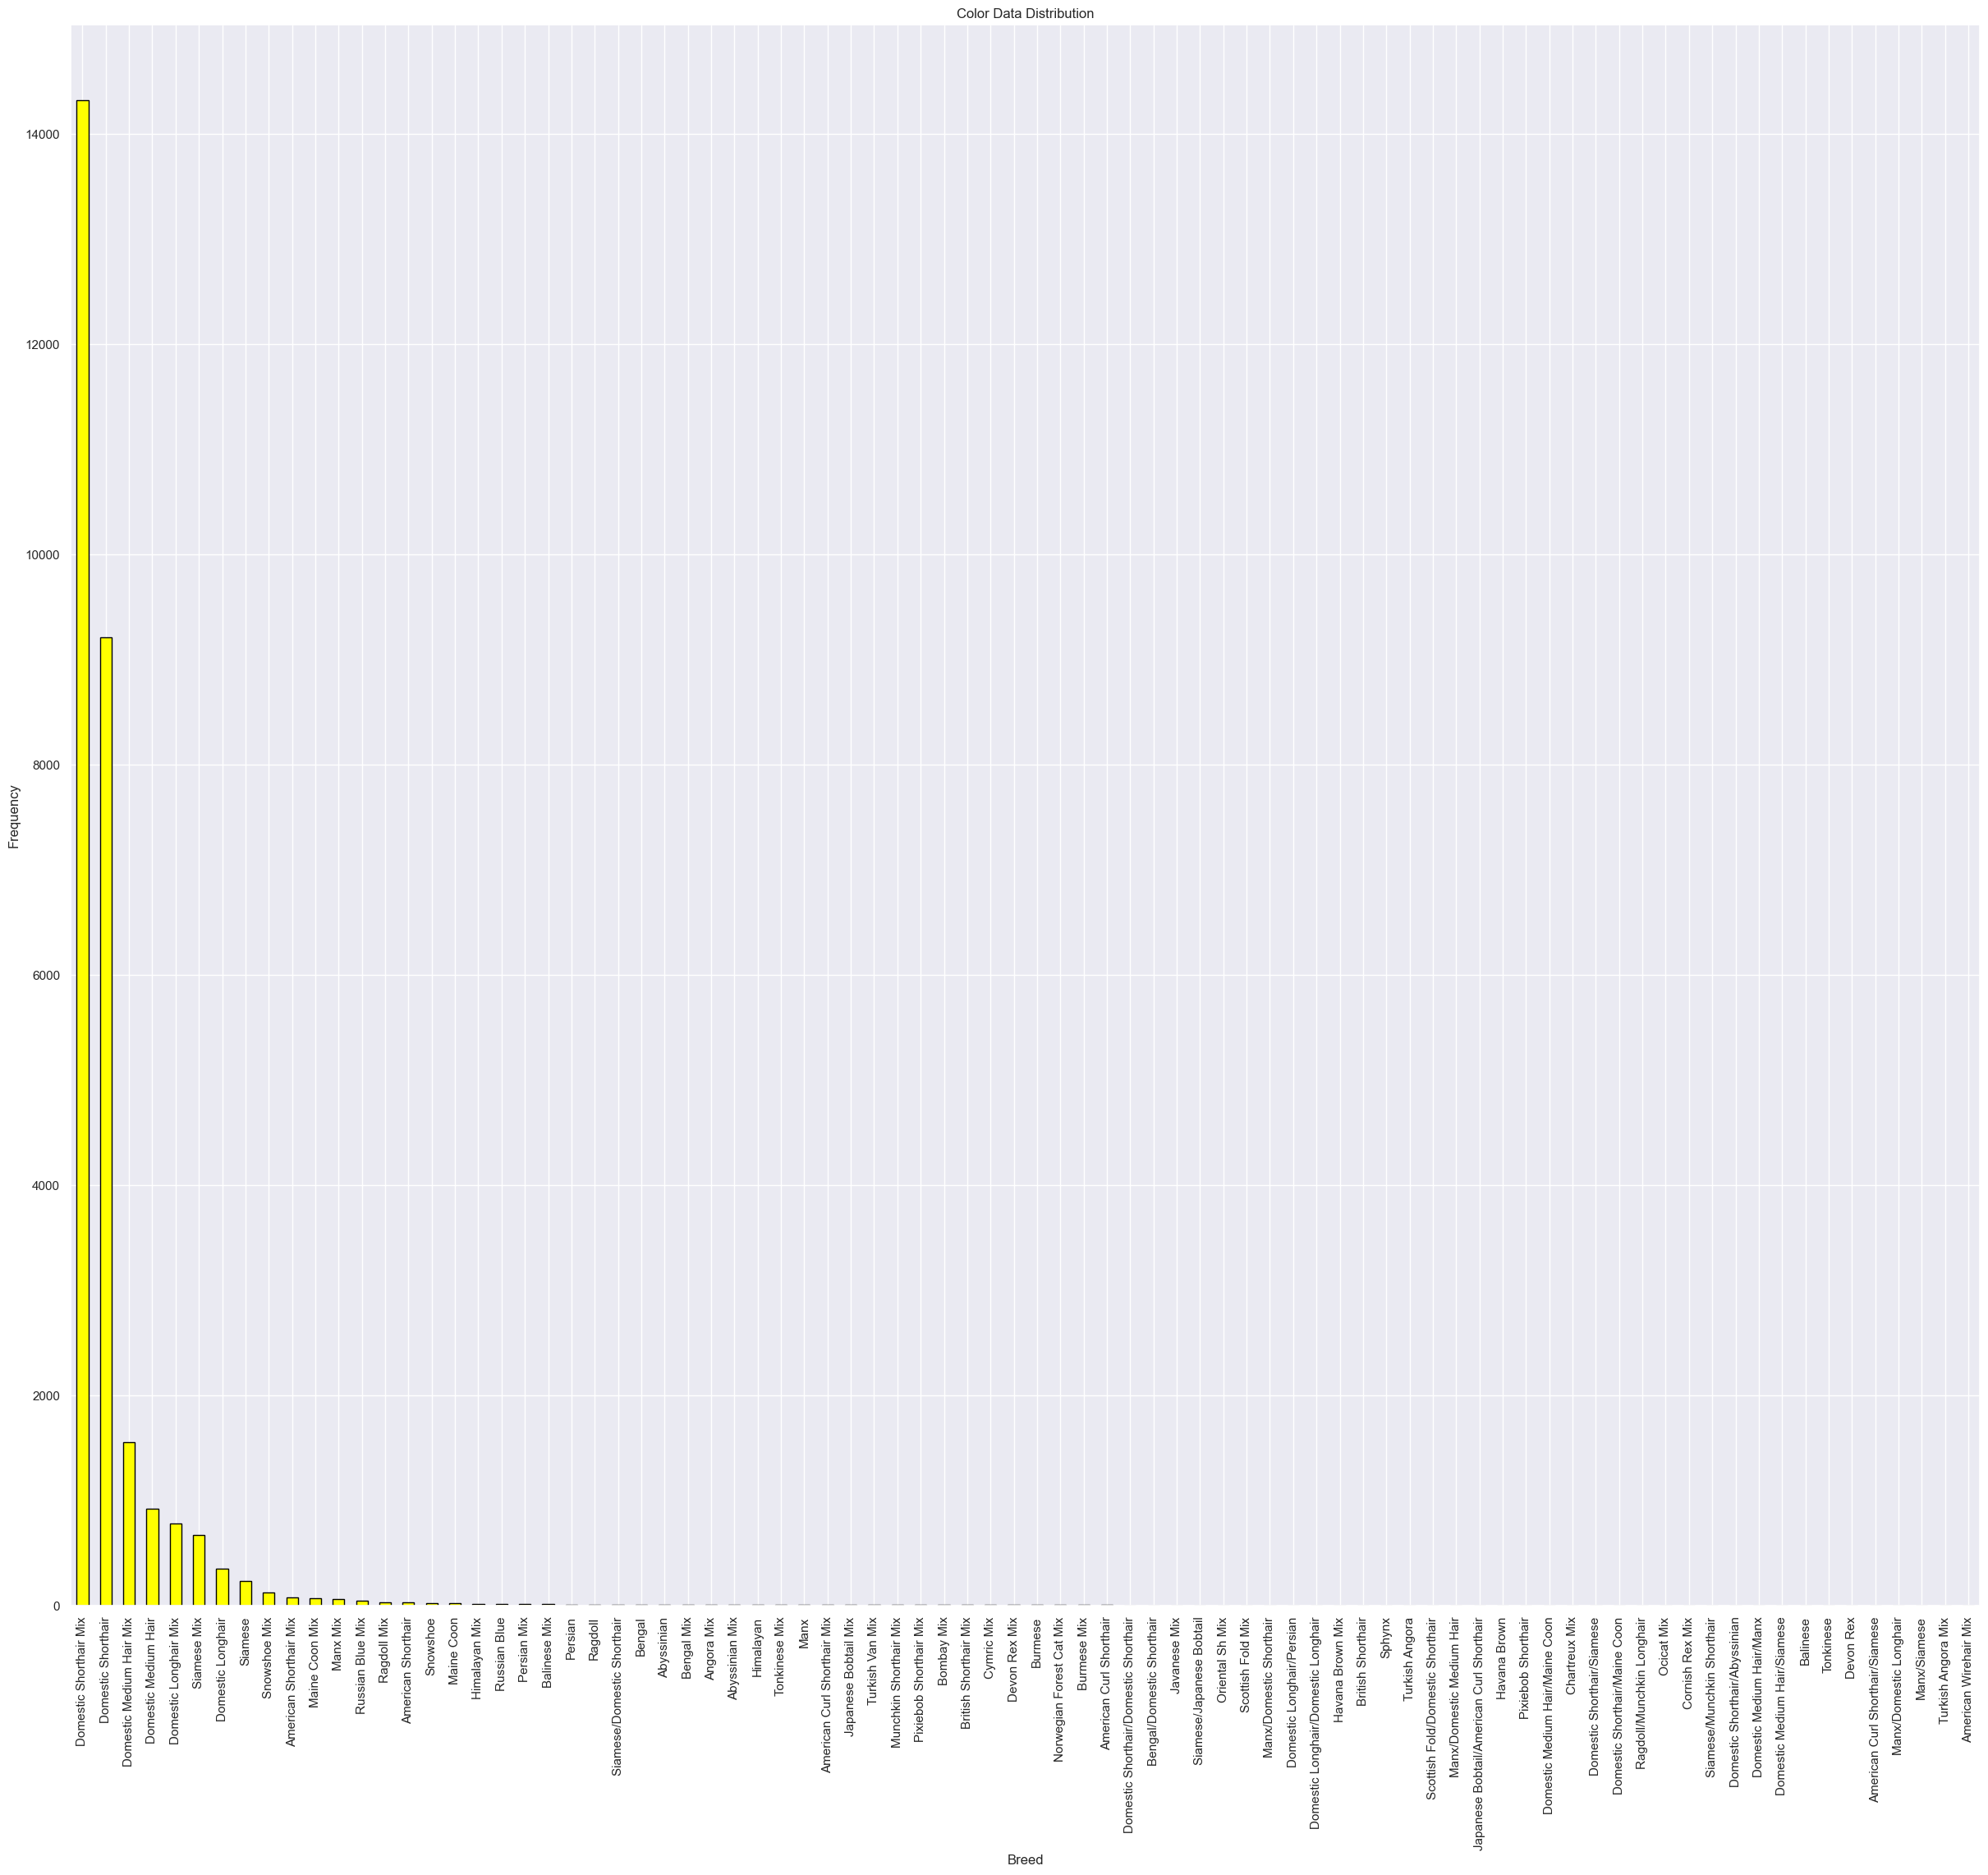

In [16]:
#NOW BREED
category_counts = df['breed'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

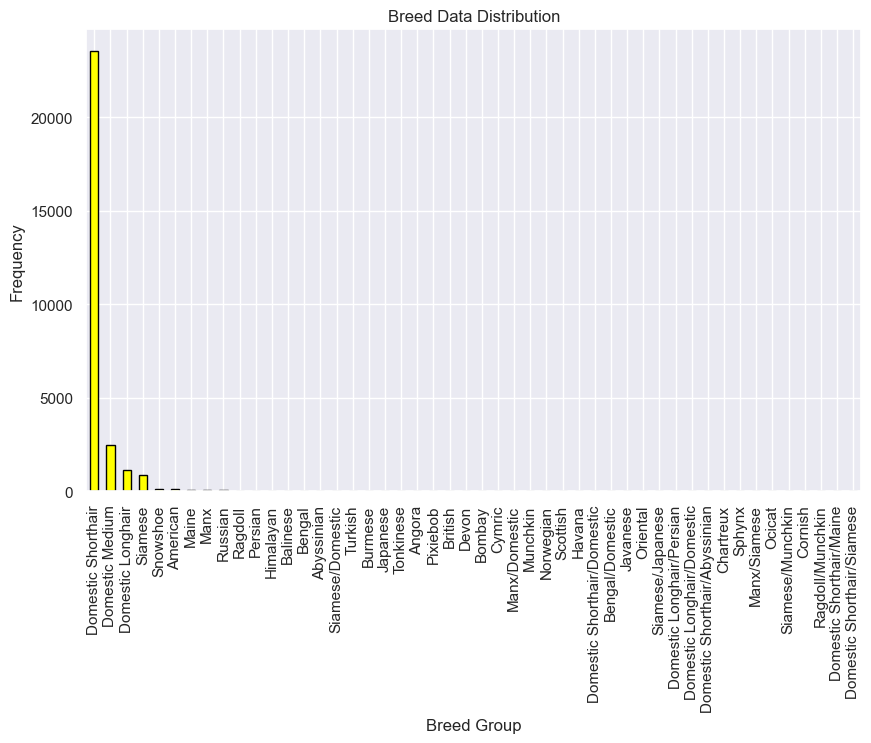

In [17]:
#we do the same as colors, only take the first string, in case of domestic, take the first two,
#because we have domestic long,short, and medium hair

# Extract the breed information
df['breed'] = df['breed'].apply(lambda x: ' '.join(x.split()[:2]) if x.startswith('Domestic') else x.split()[0])

# Count the frequencies
category_counts = df['breed'].value_counts()

# Plot the distribution
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Breed Group')
plt.ylabel('Frequency')
plt.title('Breed Data Distribution')

# Display the plot
plt.show()


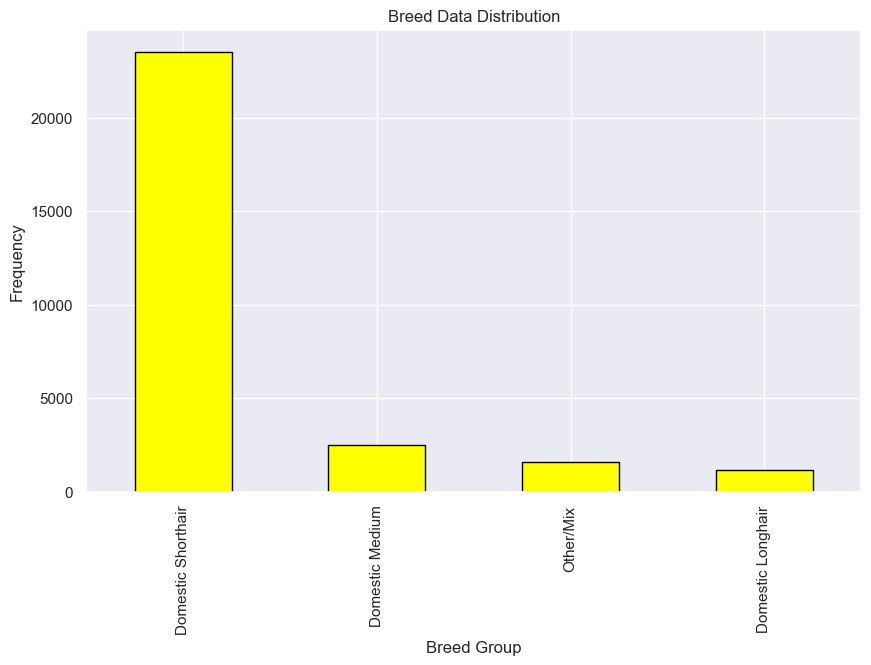

In [18]:
# Extract the breed information
df['breed'] = df['breed'].apply(lambda x: ' '.join(x.split()[:2]) if x.startswith('Domestic') else x.split()[0])

# Count the frequencies
category_counts = df['breed'].value_counts()

# Identify breeds with frequency less than 1000
breeds_to_group = category_counts[category_counts < 1000].index

# Group breeds with frequency less than 1000 into 'Other'
df['breed'] = df['breed'].apply(lambda x: 'Other/Mix' if x in breeds_to_group else x)

# Plot the distribution
category_counts = df['breed'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Breed Group')
plt.ylabel('Frequency')
plt.title('Breed Data Distribution')

# Display the plot
plt.show()


# now that we are done with the two with the most unique values, we vizualize the rest, we obviously will drop unknown for sex

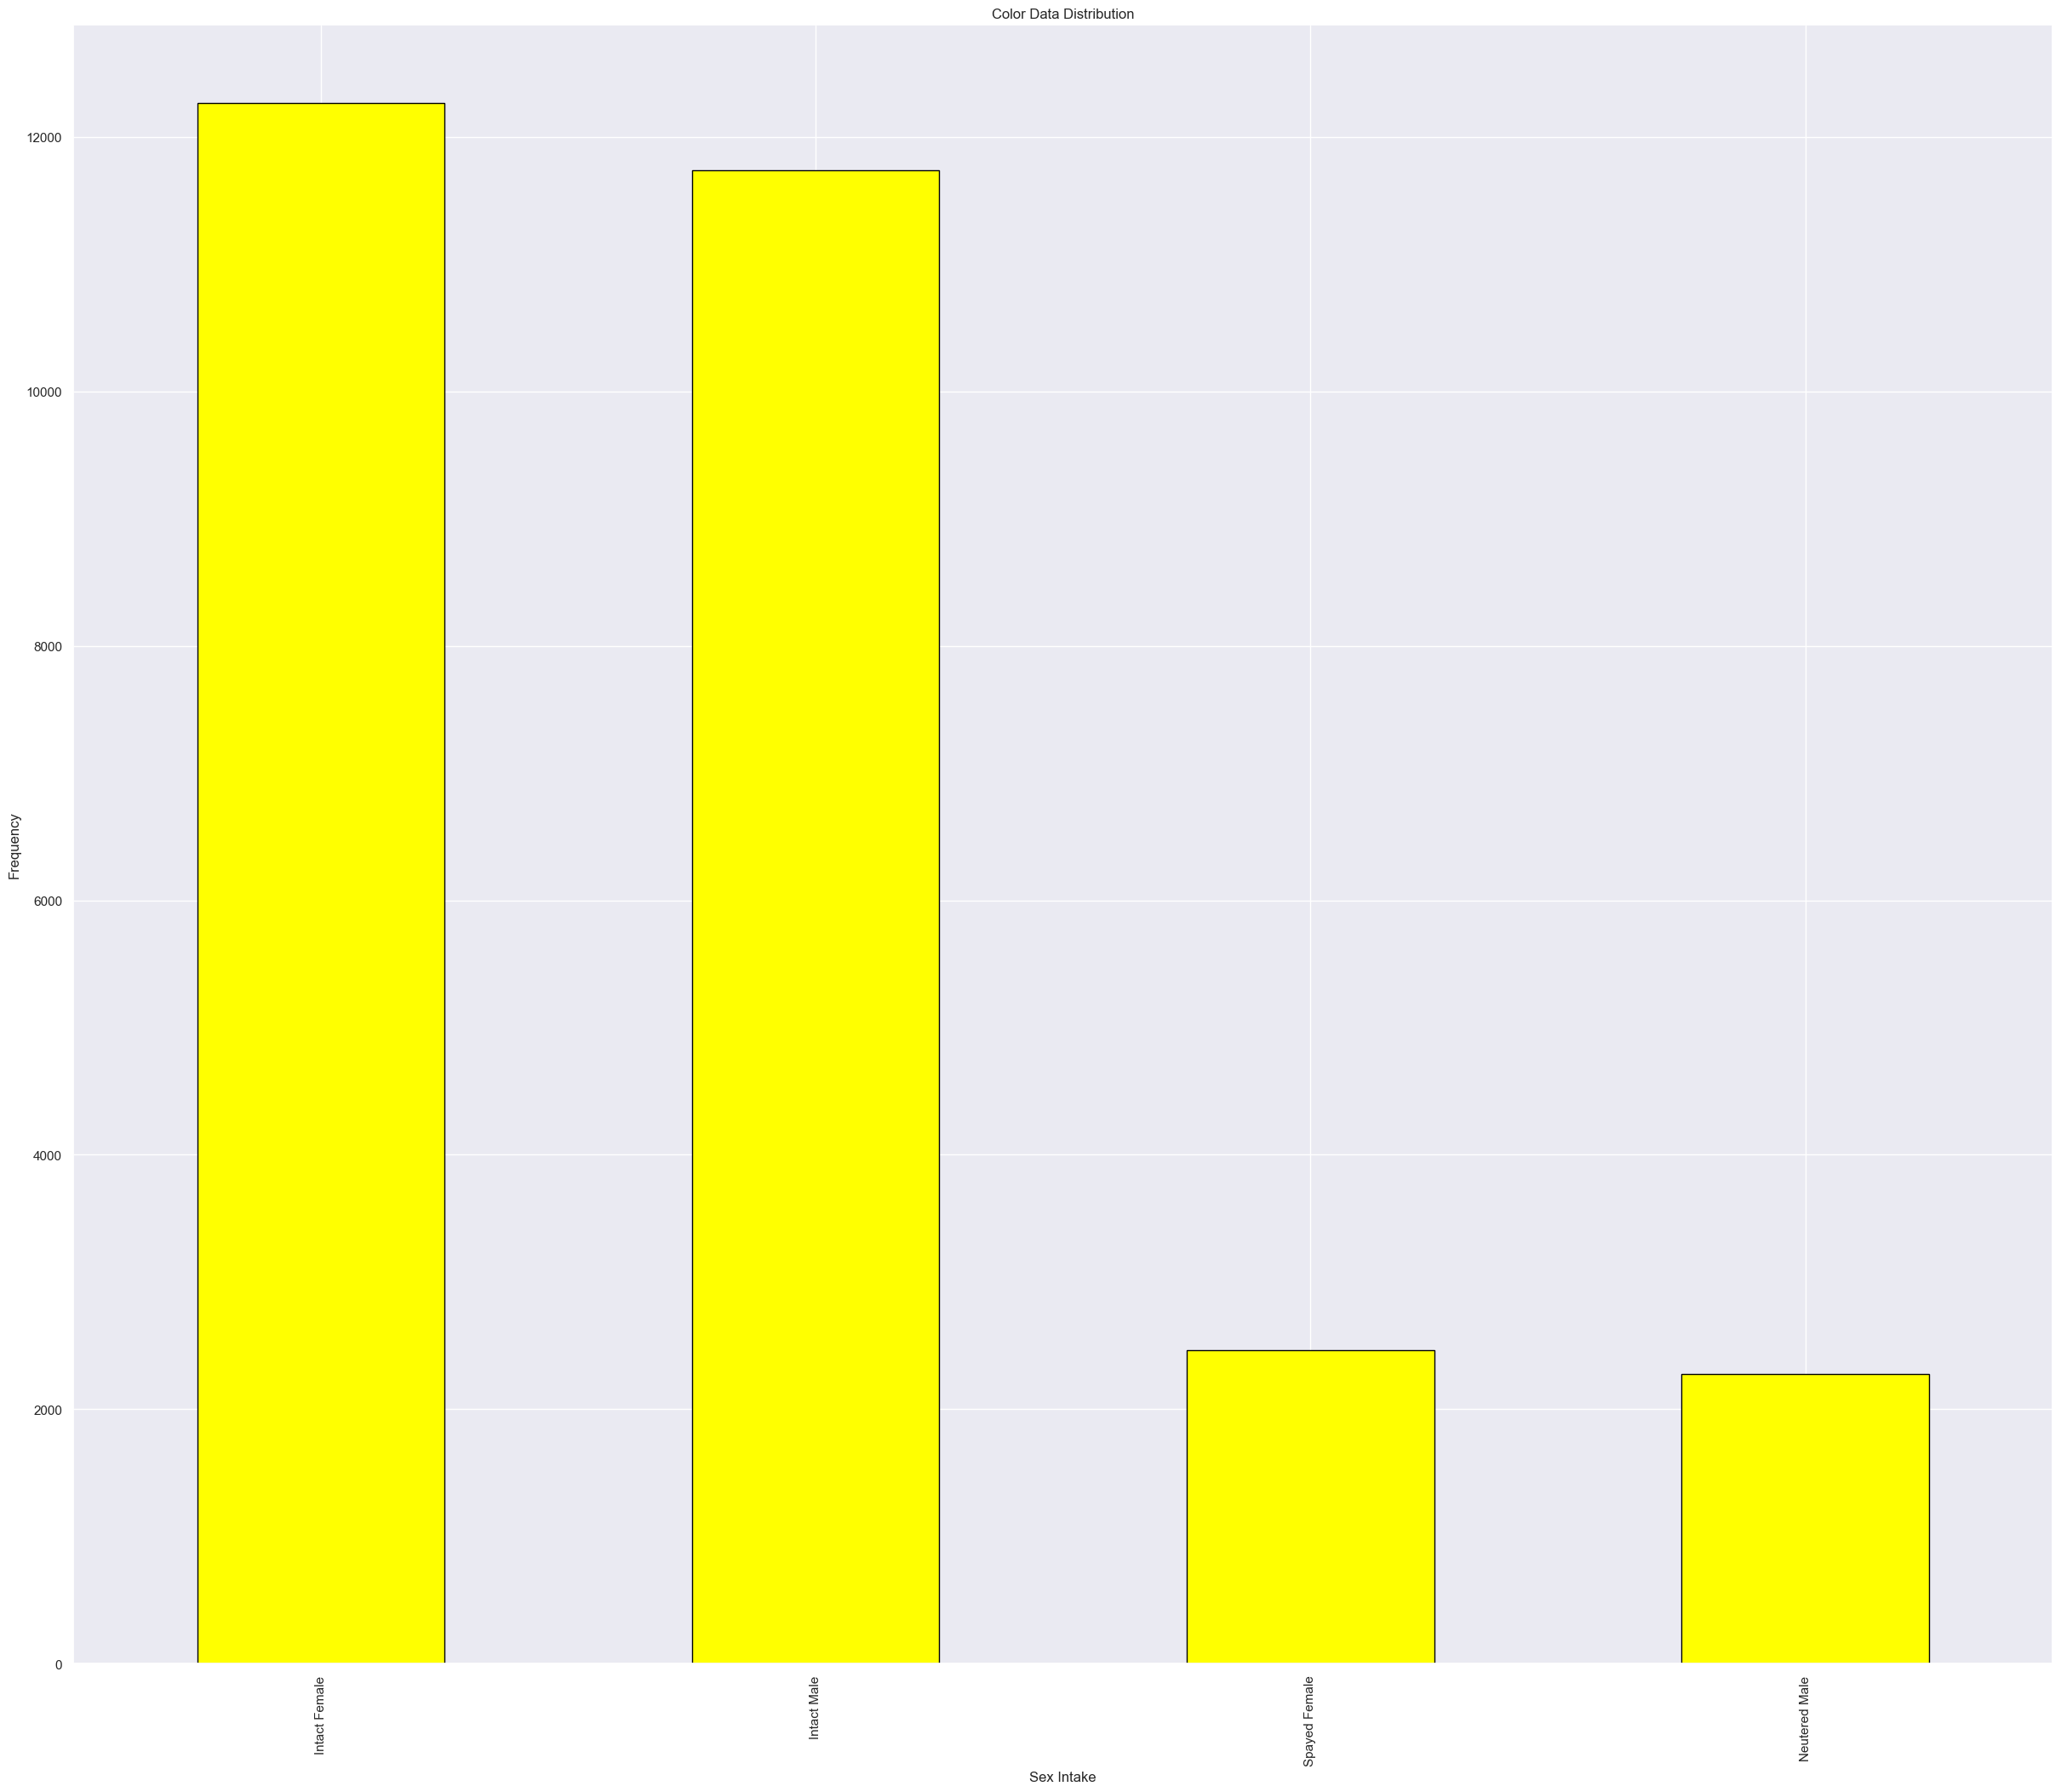

In [19]:
df = df[df['sex_intake'] != 'Unknown']
category_counts = df['sex_intake'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Sex Intake')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

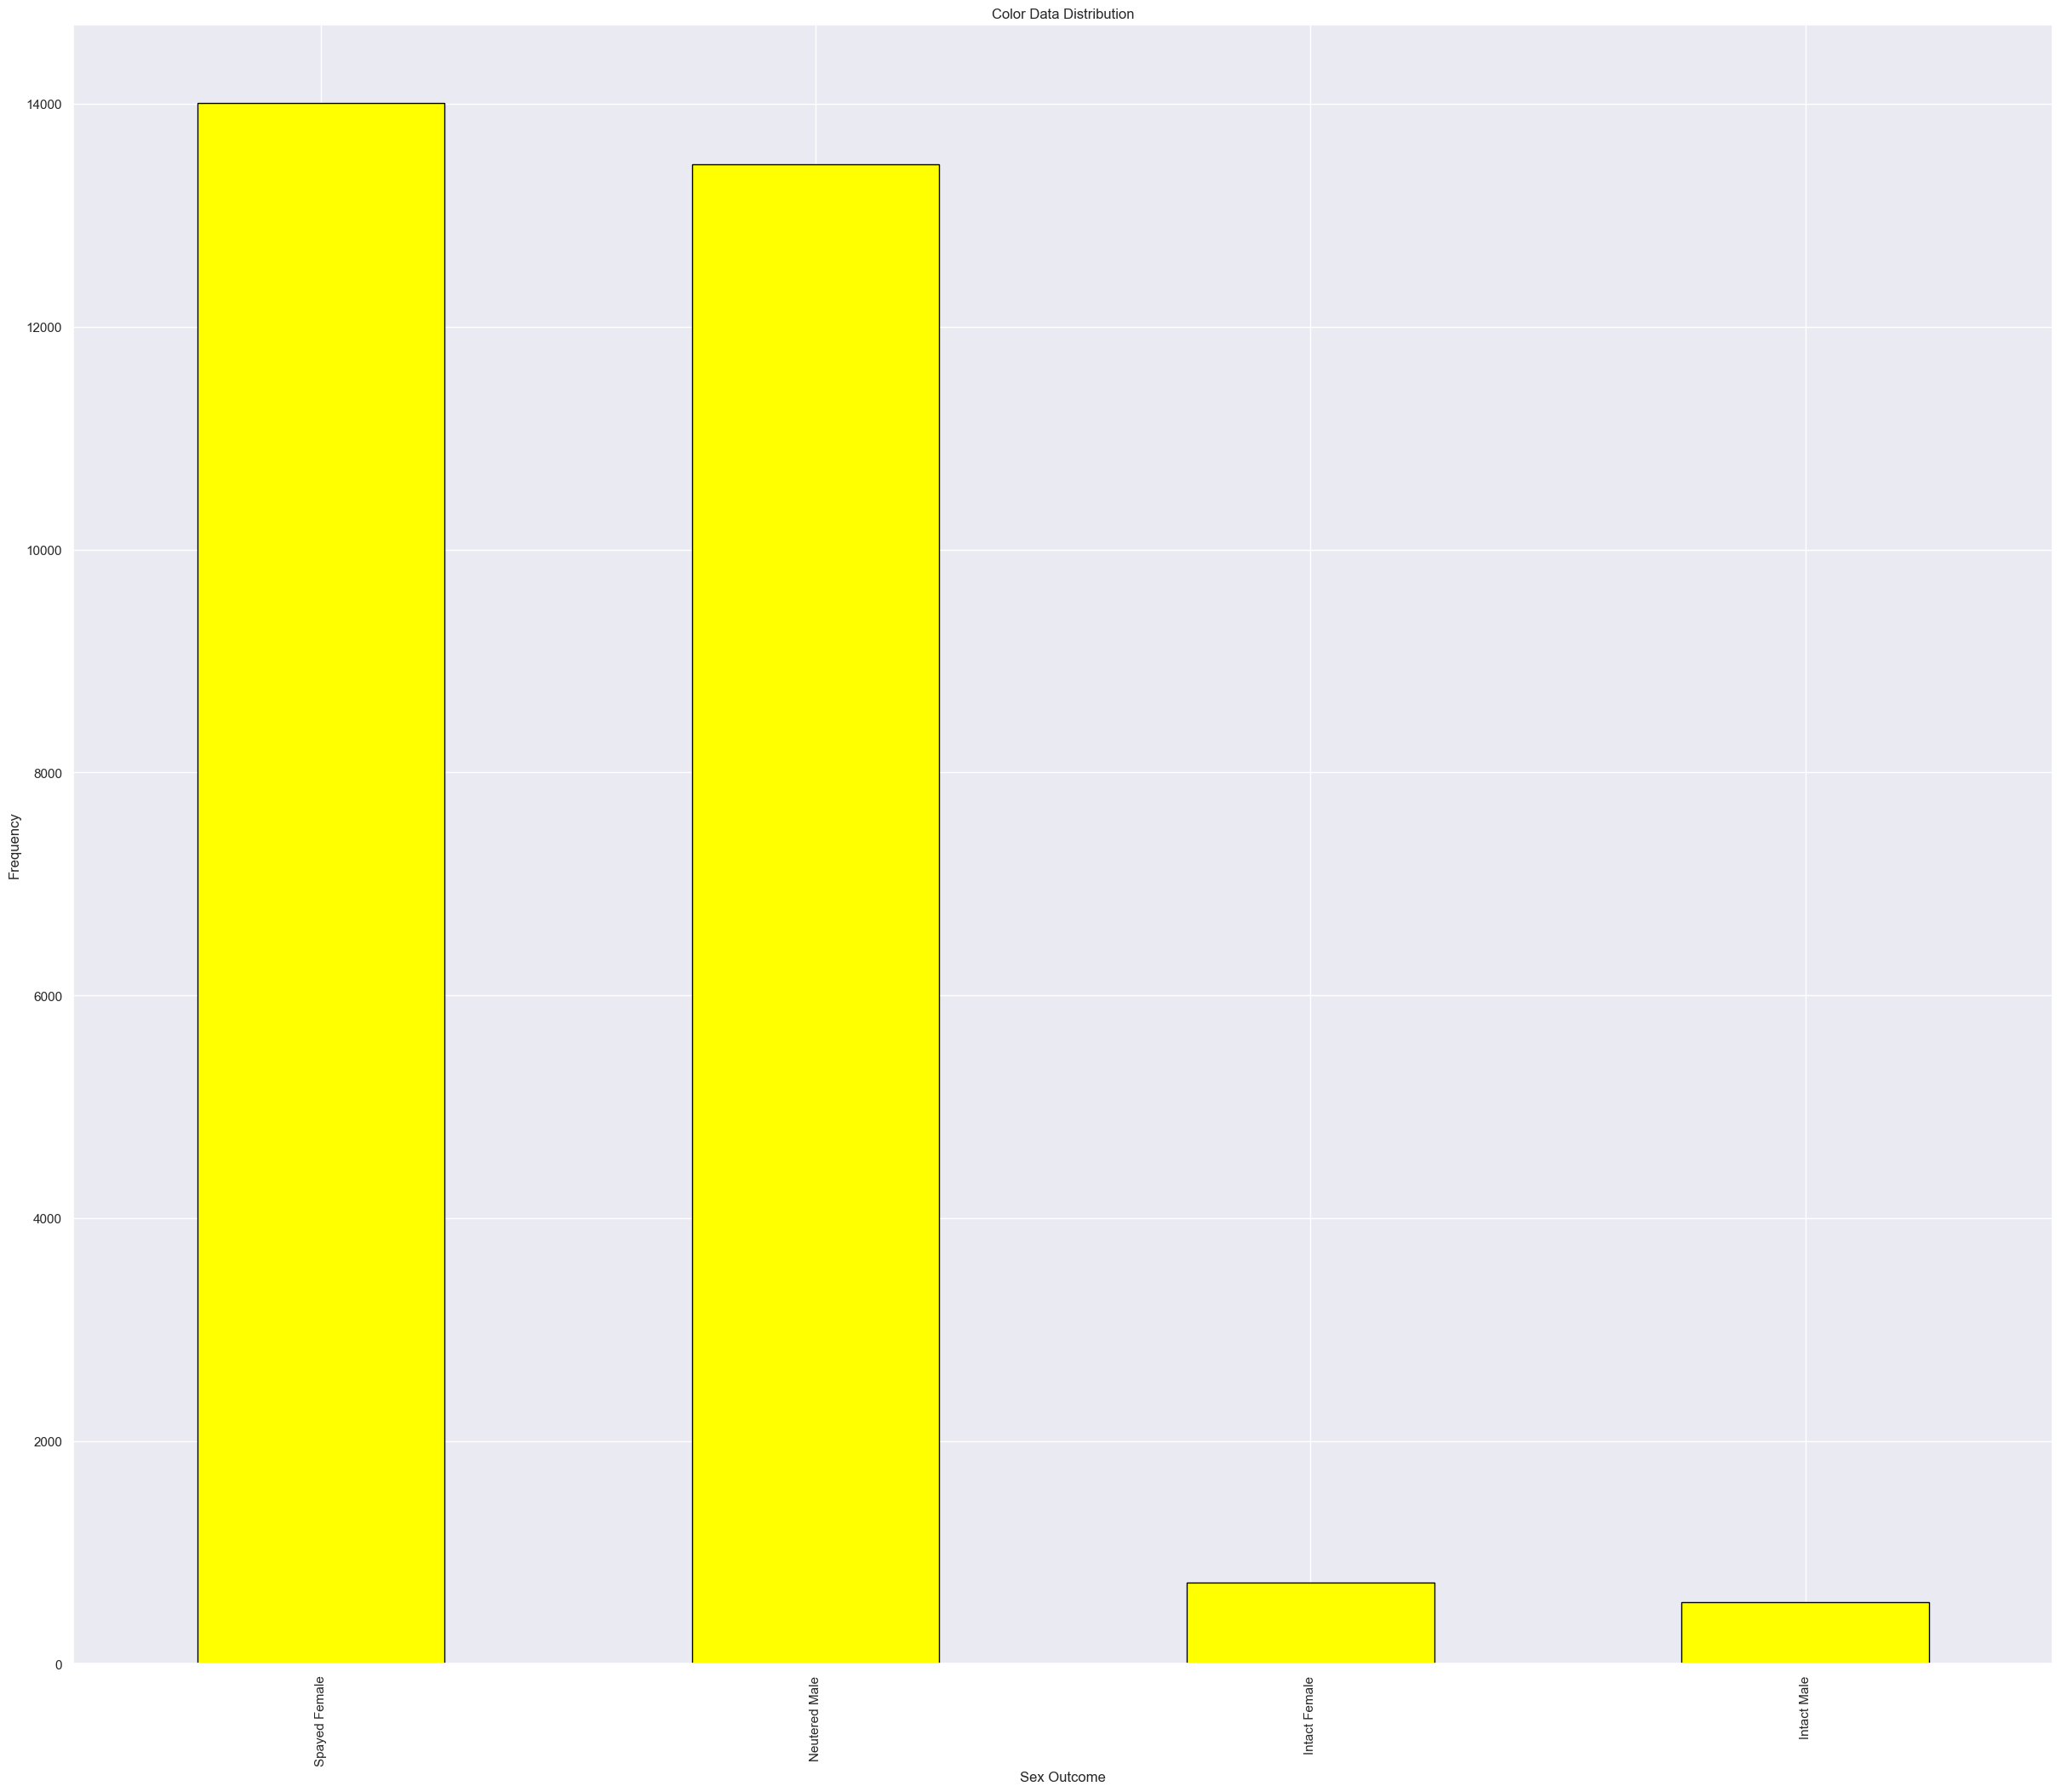

In [20]:
# Drop rows where 'sex_outcome' is 'Unknown'
df = df[df['sex_outcome'] != 'Unknown']

# Plot the distribution after dropping 'Unknown'
category_counts = df['sex_outcome'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Sex Outcome')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()


# see how it goes from intact f/m to spayed/neutered?

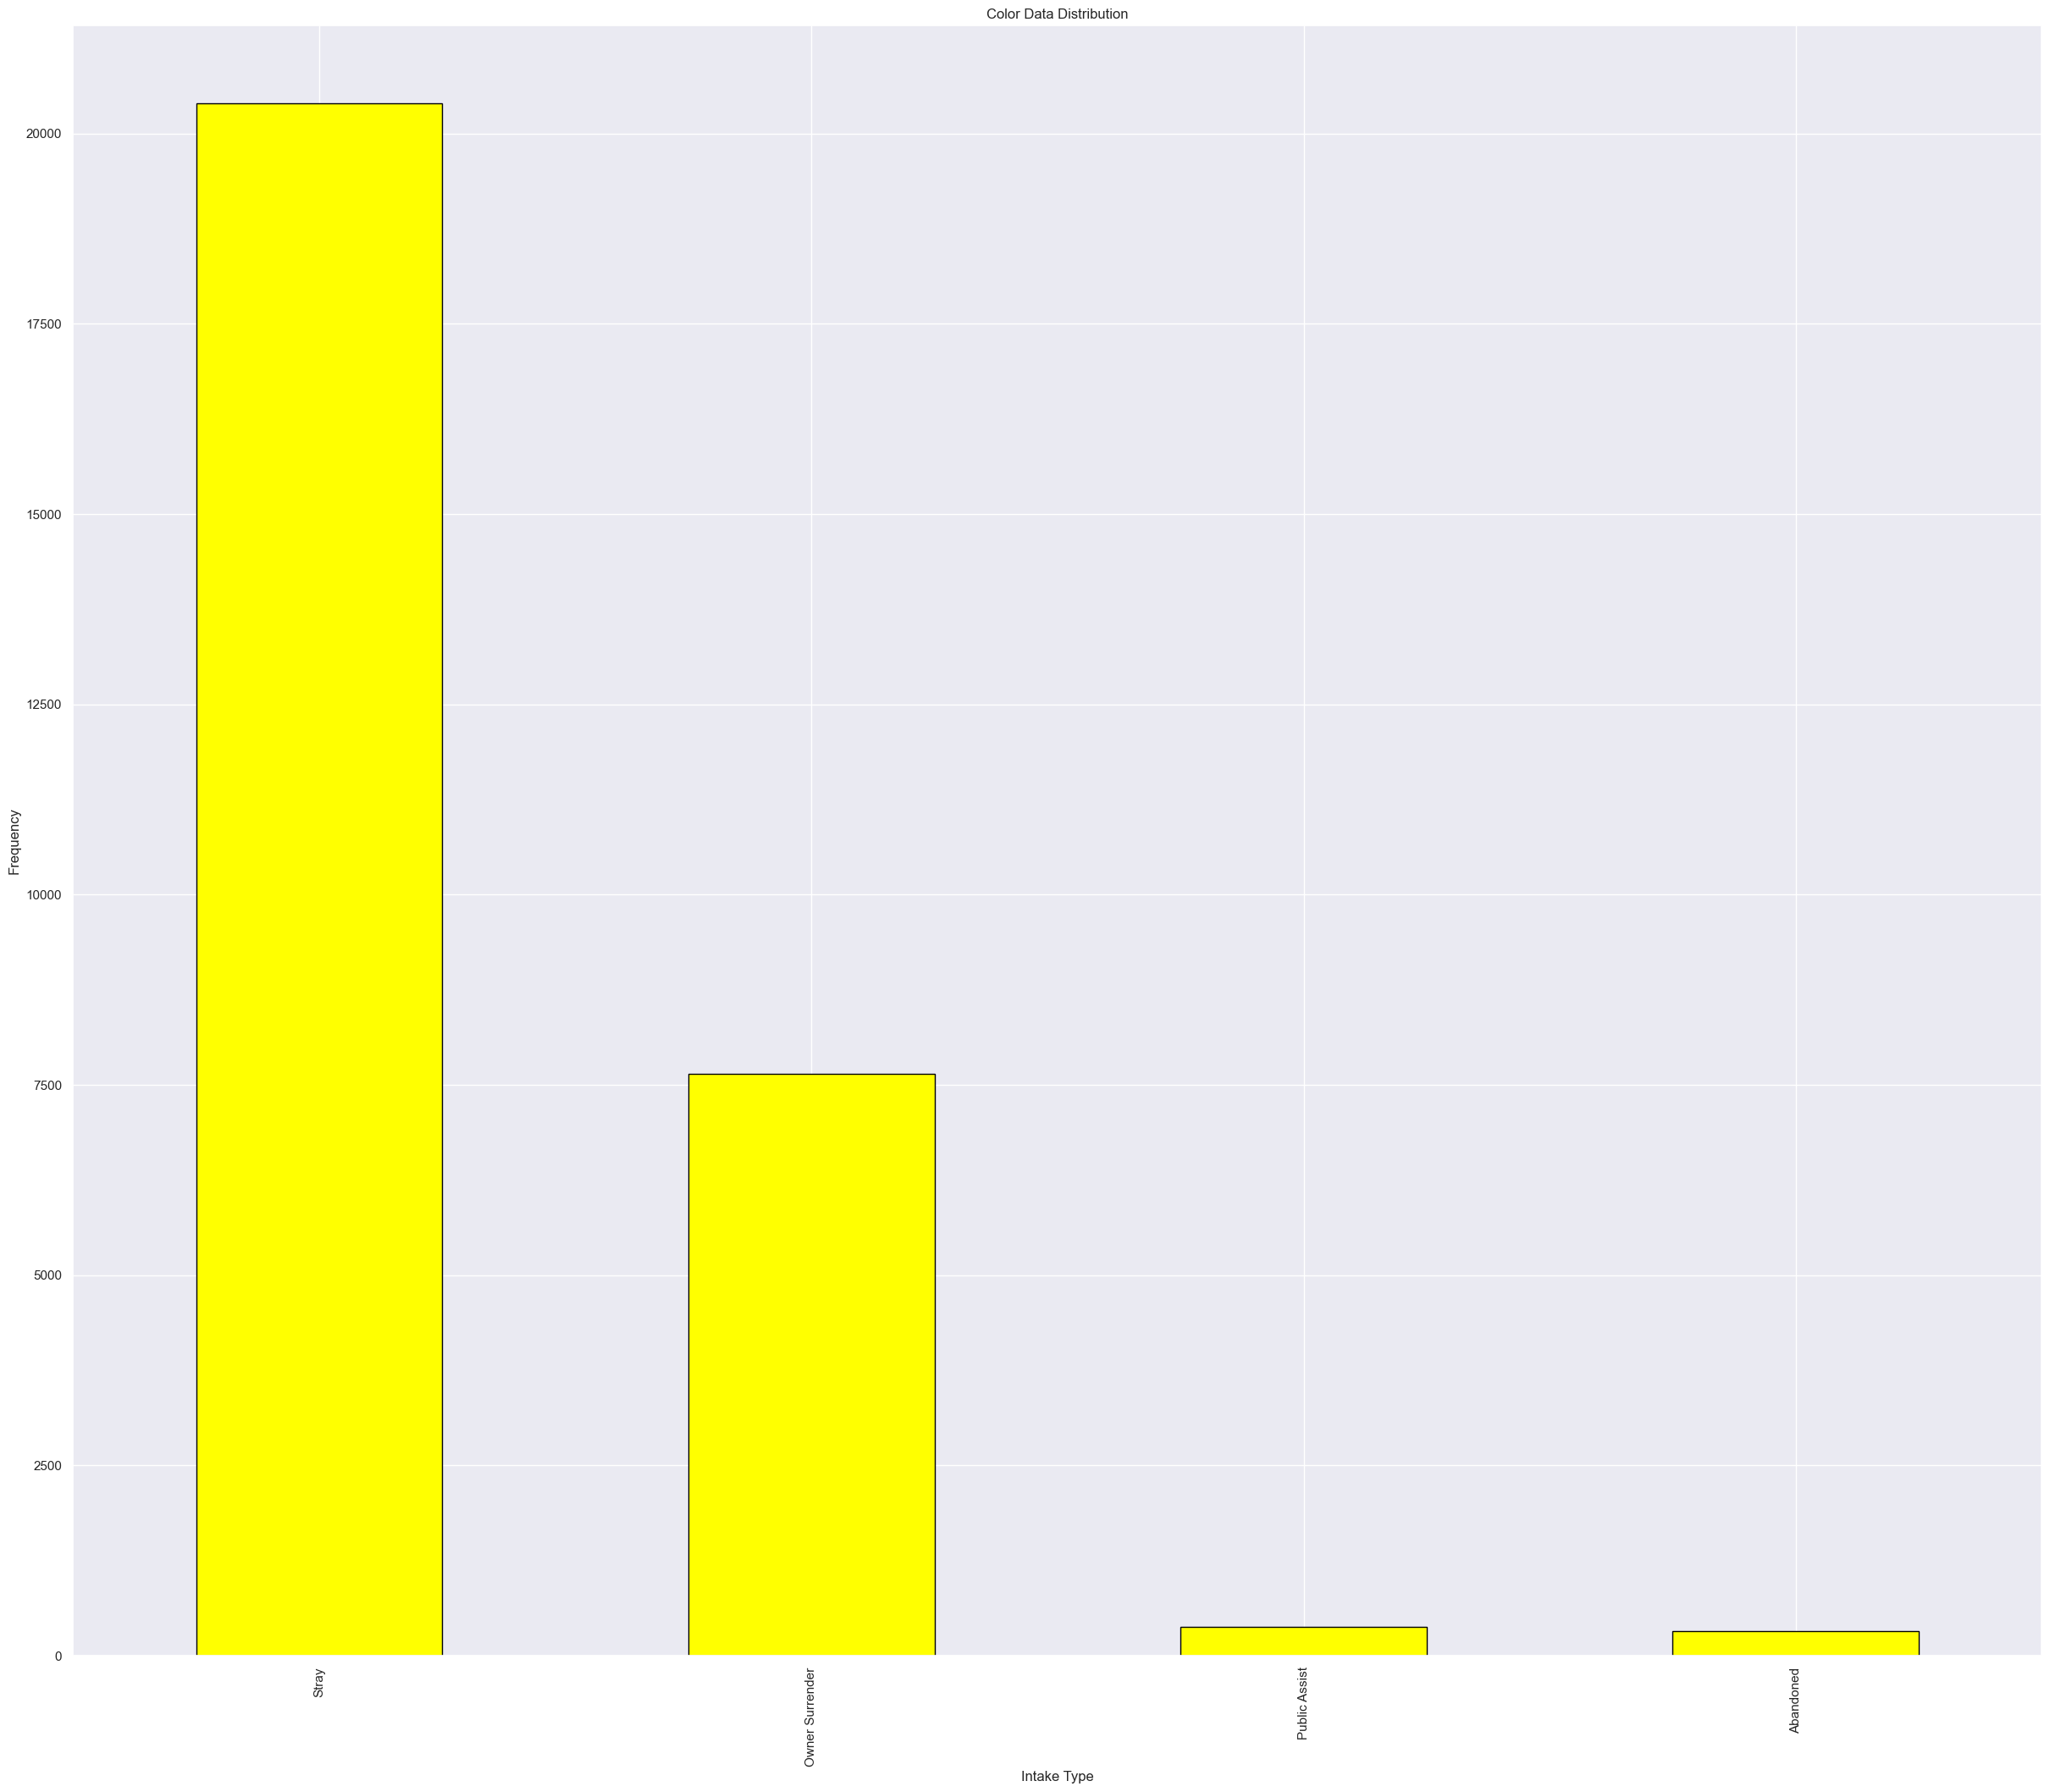

In [21]:
#cats might get spayed or not before being adopted
df = df[df['intake_type'] != 'Euthanasia Request']
category_counts = df['intake_type'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

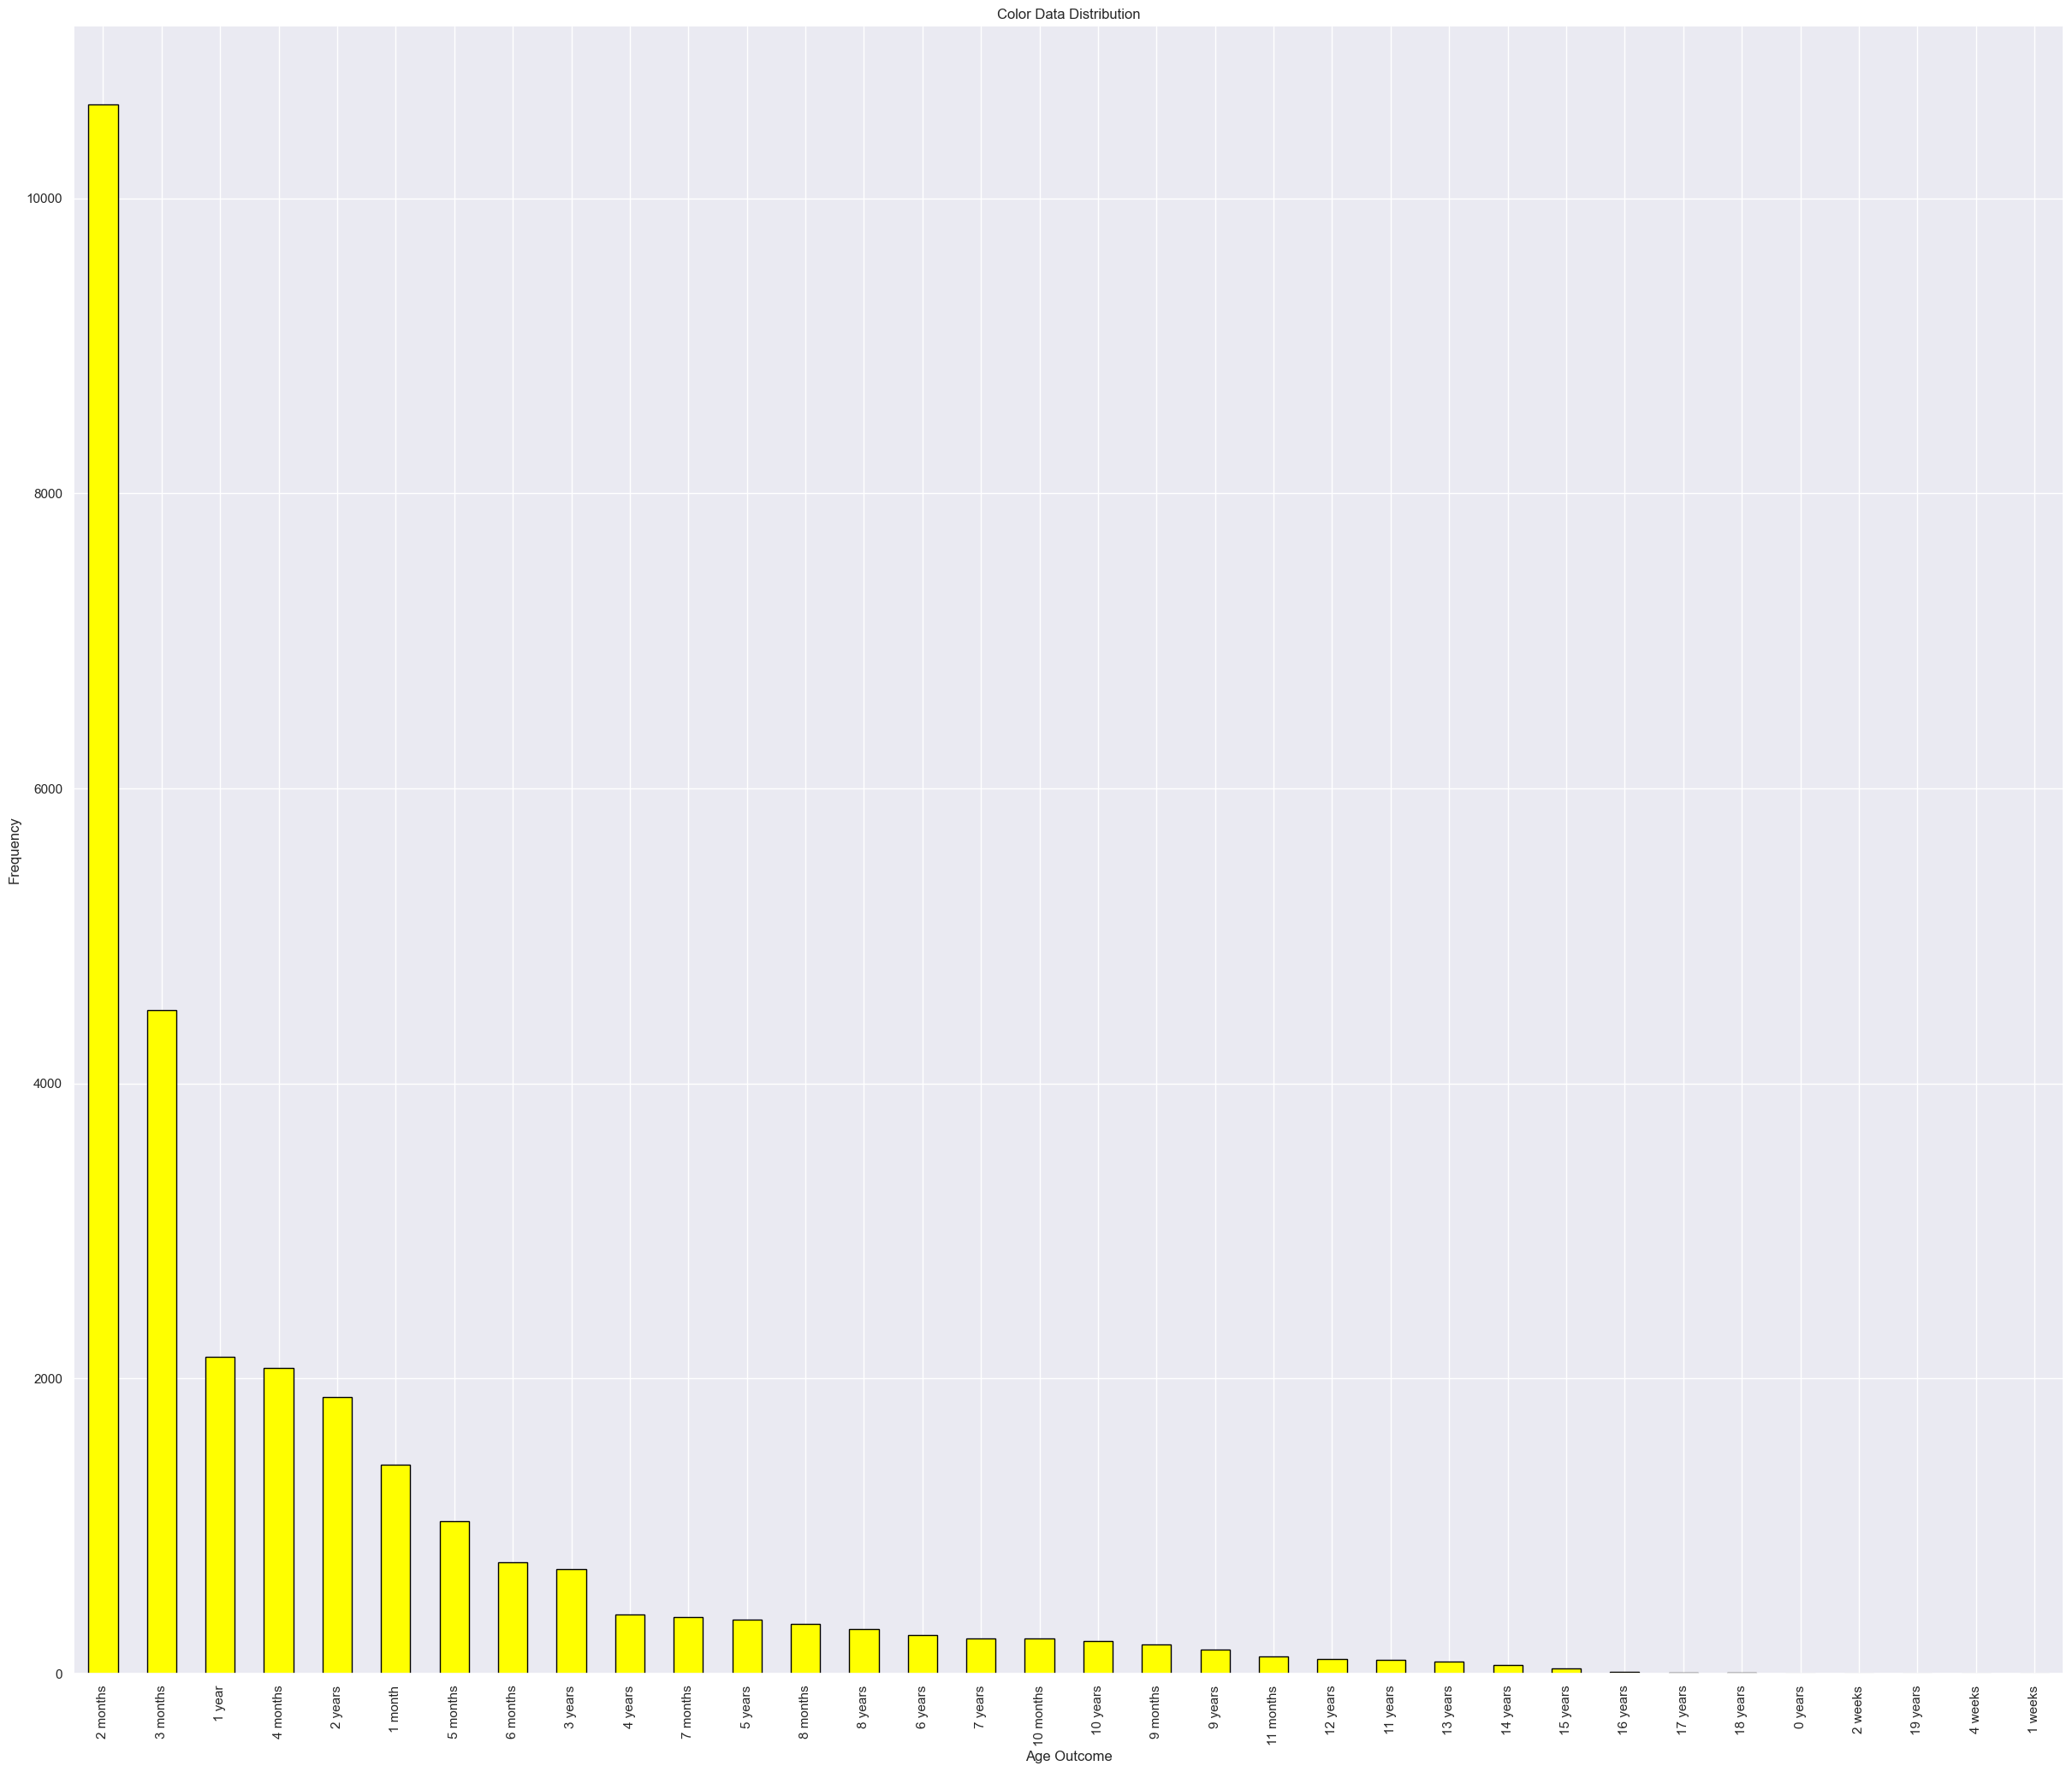

In [22]:
#THE OLDER THEY ARE, THE LESS LIKELY THEY GET ADOPTED, CATS THAT ENTERED OLD, MIGHT NOT LEAVE, WILL BECOME OLDER
#kittens too young might not a trend in age at outcome bc they are too little and delicate to leave
category_counts = df['age_outcome'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Age Outcome')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

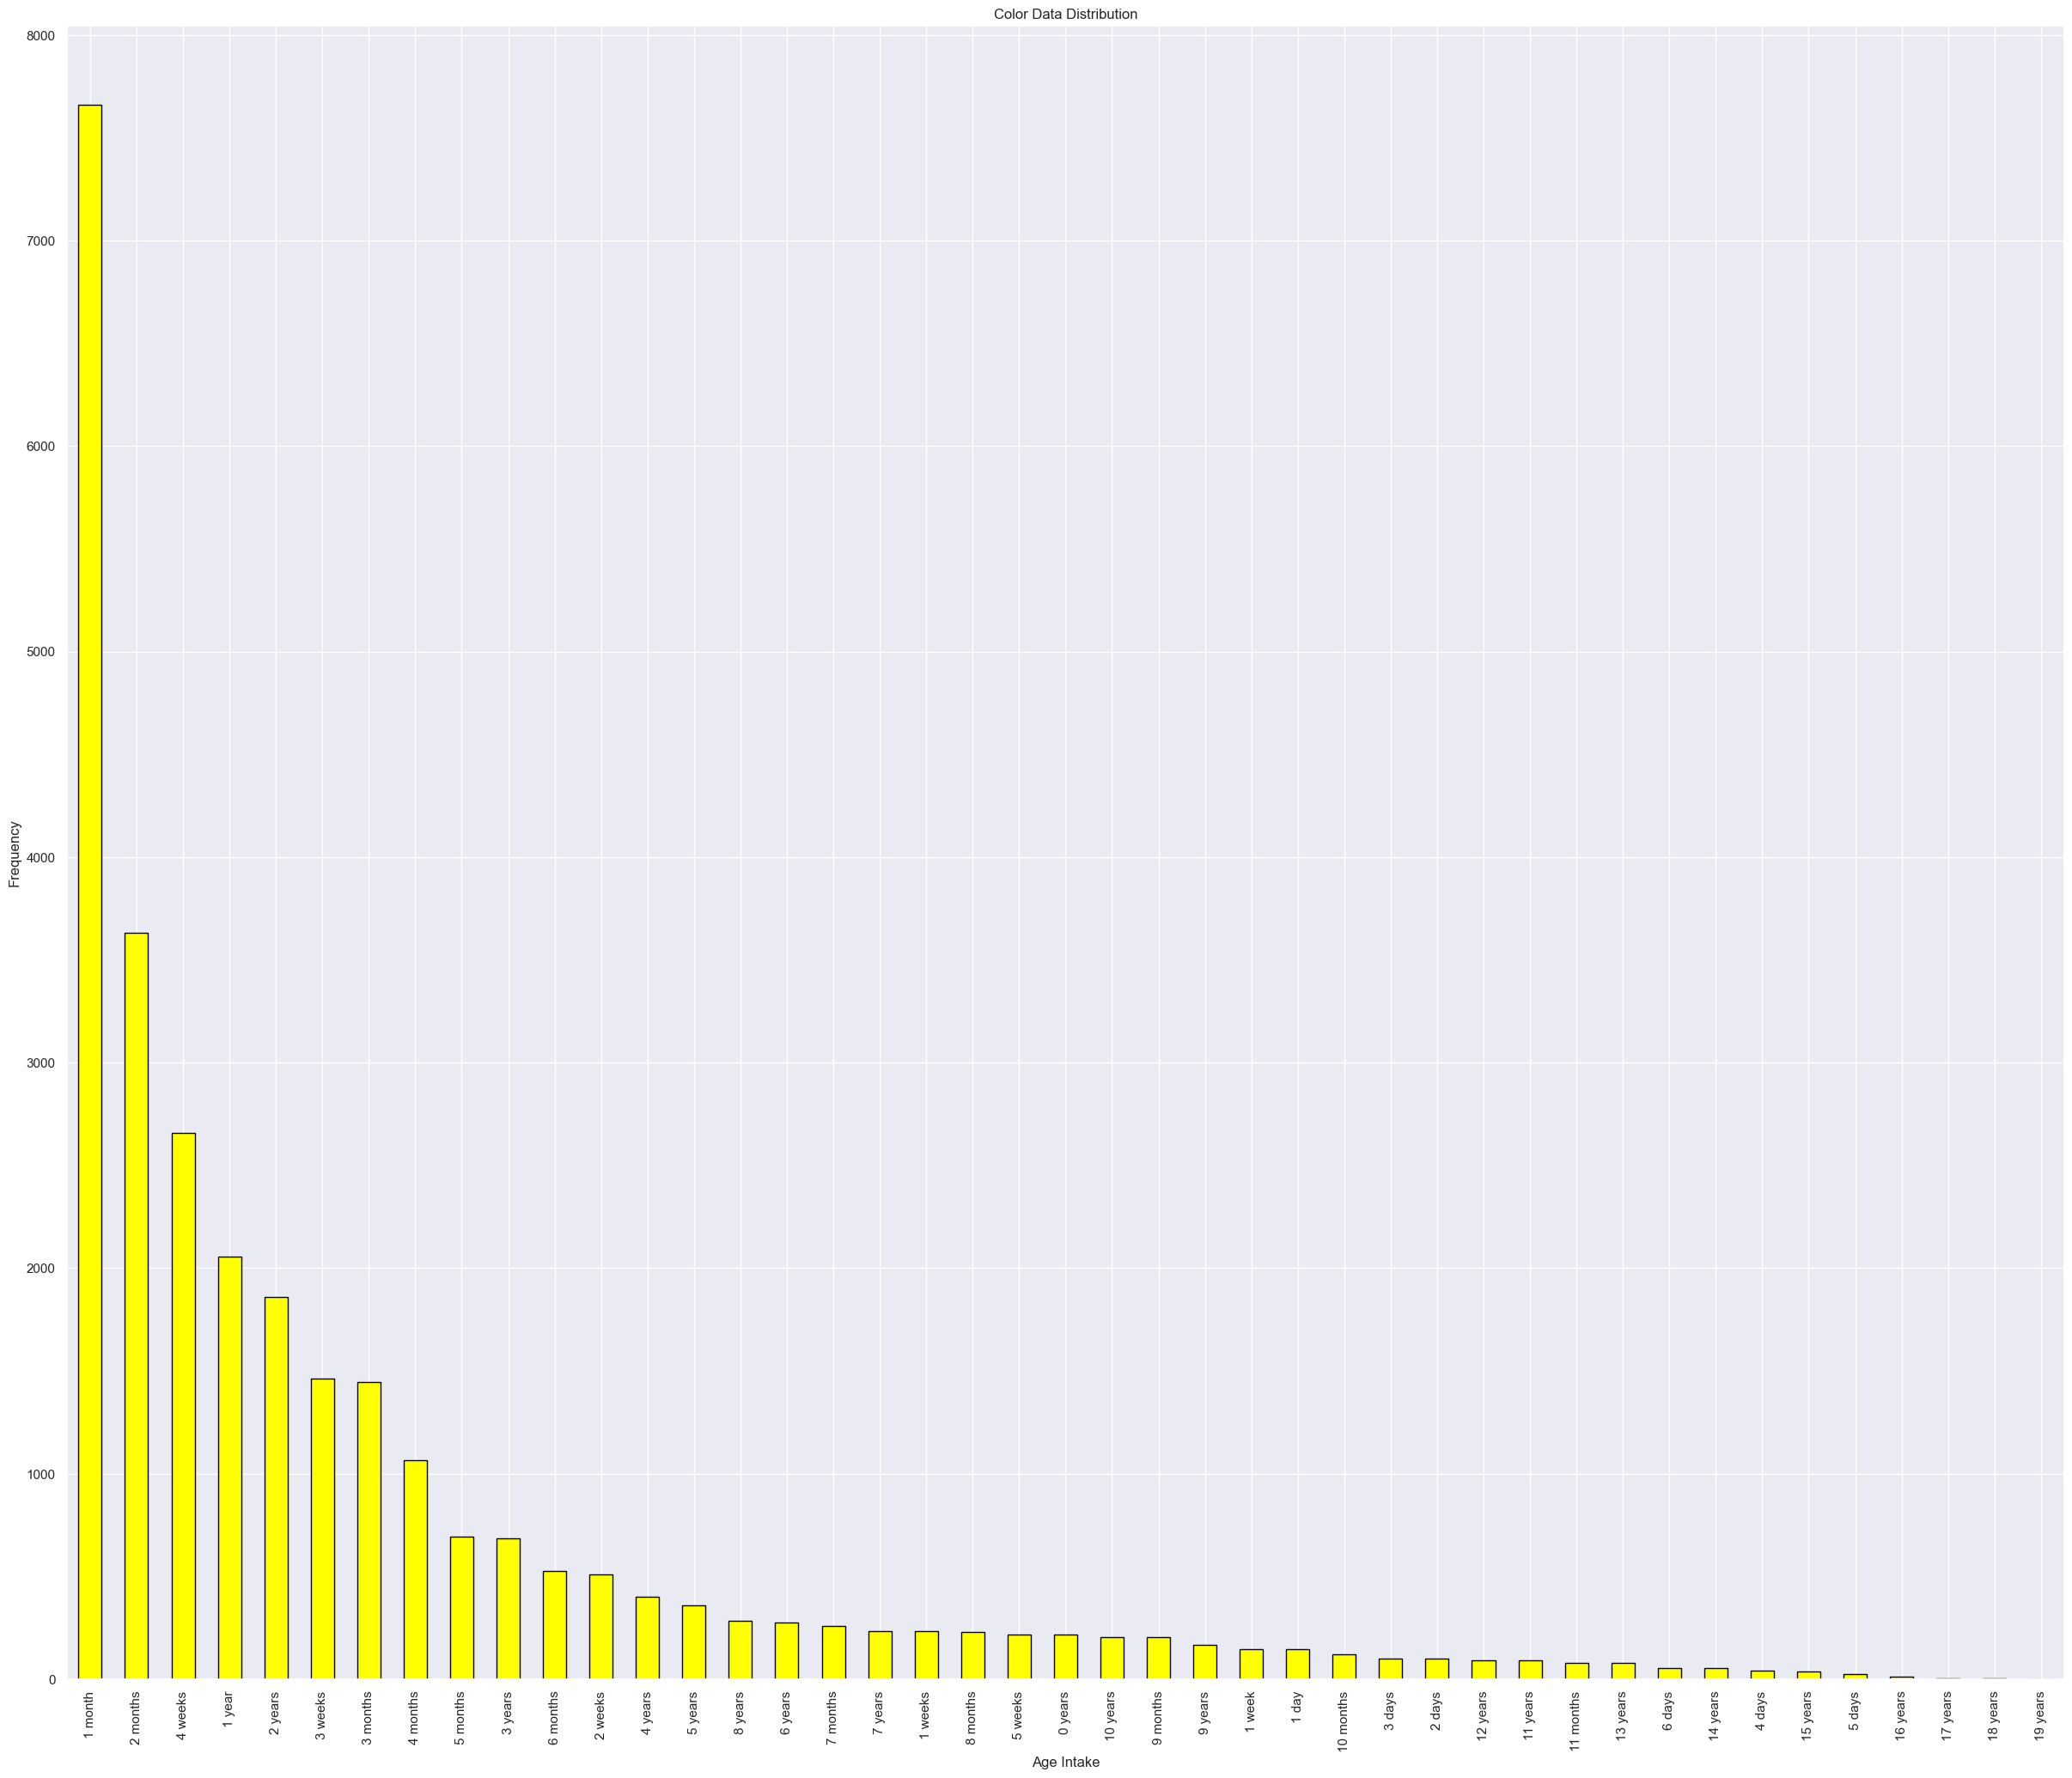

In [23]:
category_counts = df['age_intake'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Age Intake')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

In [24]:
df.to_csv('clean_texas.csv', index=False)